# Descrittive v1

In [33]:
import pandas as pd

# Carica il file CSV
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Colonne da escludere
colonne_da_escludere = ["ID", "attribute_1", "attribute_6", "submitdate", "startdate", "datestamp"]

# Filtra le colonne da analizzare
colonne_da_analizzare = [col for col in df.columns if col not in colonne_da_escludere]

# Crea un dizionario in cui ogni colonna ha come valori i suoi valori unici (senza ripetizioni), ordinati
unici_dict = {}
for col in colonne_da_analizzare:
    unici_dict[col] = sorted(df[col].dropna().unique().tolist())

# Trova la lunghezza massima delle liste di valori unici
max_len = max(len(valori) for valori in unici_dict.values())

# Crea un nuovo DataFrame riempiendo con NaN dove mancano valori
df_unici = pd.DataFrame({col: unici_dict[col] + [None] * (max_len - len(unici_dict[col])) 
                         for col in unici_dict})

# Salva su CSV
df_unici.to_csv("Valori_unici_per_colonna.csv", index=False, encoding="utf-8")

### labels map

The meaning of the labels (e.g. WTP2_1) is shown in the map

In [1]:
# Mappatura dei codici variabili con le etichette descrittive
# Questa mappatura è necessaria per visualizzare i grafici con etichette comprensibili

mappa_colonne = {
    "G1": "Genere",
    "G2": "Età",
    "cleta": "Classe d'età",
    "regione": "Regione di residenza",
    "Area": "Area geografica",
    "provincia": "Provincia di residenza",
    "codcom_1": "Codice comune di residenza",
    "codcom_2": "Comune di residenza",
    "ampiezza": "Numero abitanti",
    "ampiezzaclasse": "Ampiezza comune in classi",
    "G5": "Formazione scolastica",
    "G6": "Occupazione",
    "G7": "Reddito netto familiare annuo",
    "TA1": "Tempo medio daily: casa-destinazione",
    "TA1a": "Tempo medio daily: casa-destinazione (Se variabile)",
    "TA1b": "km giornalieri per spostamenti casa-destinazione)",
    "TA1c": "km giornalieri per spostamenti casa-destinazione (Se variabile)",
    "TA1bis": "Tappe intermedie tragitto casa-destinazione",
    "TA2": "Utilizzo trasporto pubblico",
    "TA3": "Trasporto pubblico usato",
    "TA4": "Possesso veicolo a motore",
    "TA5": "Veicolo usato abitualmente",
    "TA6": "Utilizzo car sharing",
    "TA7s": "Specificare altro tipo di alimentazione",
    "TA8": "Spesa media mensile: casa-lavoro",
    "TA8bis": "Percentuale spesa in carburante",
    "EA_1": "Emissioni di CO2 e riscaldamento globale",
    "EA_2": "Cambiamento climatico e attività umane",
    "EA_3": "Aumento temperatura media globale",
    "EA_4": "Inquinamento e salute umana",
    "PP1_1": "Gravità del cambiamento climatico oggi",
    "PP2_1": "Priorità politiche ambientali e salute pubblica",
    "PP2_2": "Costi danni cambiamento climatico vs investimenti",
    "PP2_3": "Riduzione importazioni combustibili fossili e sicurezza energetica",
    "PP2_4": "Innovazione e competitività imprese UE",
    "PP2_5": "Sostegno finanziario pubblico per energia pulita",
    "PP2_6": "Adattamento ai cambiamenti climatici e vantaggi per cittadini UE",
    "PT_1": "Affidabilità fonti di informazione: media",
    "PT_2": "Affidabilità fonti di informazione: politici",
    "PT_3": "Affidabilità fonti di informazione: governi",
    "PT_4": "Affidabilità fonti di informazione: istituzioni pubbliche",
    "PT_tot": "Fiducia nelle fonti di informazione",
    "PAPA_1": "Azione intrapresa: compensazione emissioni CO2",
    "PAPA_2": "Azione intrapresa: acquisto auto elettrica o a basso consumo",
    "PAPA_3": "Azione intrapresa: mobilità dolce",
    "PAPA_4": "Azione intrapresa: trasporto alternativo al veicolo privato",
    "PAPA_5": "Azione intrapresa: acquisto prodotti locali",
    "PAPA_6": "Azione intrapresa: riduzione rifiuti di imballaggio",
    "PAPA_7": "Azione intrapresa: contratto fornitura elettrica con rinnovabili",
    "AMB_tot": "Preoccupazioni ambientali",
    "AMB_tot": "Preoccupazioni ambientali", # = somma di EA_1, EA_2, EA_3, EA_4 + somma di PP1_1, PP2_1, PP2_2, PP2_3, PP2_4, PP2_5, PP2_6 + somma di PAPA_1, PAPA_2, PAPA_3, PAPA_4, PAPA_5, PAPA_6, PAPA_7
    "AFKintro": "Conoscenza combustibili alternativi",
    "AFK_1": "Veicolo completamente elettrico considerato combustibile alternativo",
    "AFK_2": "Elettrico ibrido plug-in considerato combustibile alternativo",
    "AFK_3": "GPL considerato combustibile alternativo",
    "AFK_4": "Metano considerato combustibile alternativo",
    "AFK_5": "Altro considerato combustibile alternativo",
    "SE1": "Conoscenza di qualcuno con veicolo a carburante alternativo",
    "SE2": "Tipo veicolo alternativo posseduto da conoscenti",
    "AFK1": "Conoscenza dei biocarburanti",
    "AFK1bis_1": "Biodiesel e diesel tradizionale equivalenti in termini di prestazioni",
    "AFK1bis_2": "Biodiesel e diesel tradizionale costano lo stesso",
    "AFK1bis_3": "Biocarburante prodotto solo da colture alimentari",
    "AFK1bis_4": "Tecnologie avanzate per biocarburanti e uso del suolo",
    "AFK2": "Conoscenza dei veicoli elettrici",
    "AFK2bis_1": "Prestazioni veicoli elettrici rispetto alle auto ICE",
    "AFK2bis_2": "Costo ricarica batteria vs pieno di benzina",
    "AFK2bis_3": "Autonomia massima auto elettrica con carica completa",
    "AFK2bis_4": "Tempo di ricarica della batteria",
    "AFK2bis_5": "Auto elettriche a zero emissioni di carbonio",
    "AFK2bis_6": "Batteria come componente più inquinante del veicolo elettrico",
    "AFK3intro": "Conoscenza dei veicoli a idrogeno",
    "AFK3_1": "Prestazioni auto a idrogeno simili a quelle elettriche",
    "AFK3_2": "Costo dell'idrogeno paragonabile al GPL",
    "AFK3_3": "Percorrenza massima con serbatoio pieno superiore ad auto elettriche e ICE",
    "AFK3_4": "Tempo di rifornimento auto a idrogeno simile a quello delle auto tradizionali",
    "AFK3_5": "Emissioni di vapore acqueo nei veicoli a idrogeno",
    "AFK3_6": "Produzione di idrogeno a zero emissioni di carbonio",
    "AFK4intro": "Conoscenza dei veicoli efuel",
    "AFK4_1": "Efuel miscelabili con combustibili fossili e biocarburanti",
    "AFK4_2": "Costo degli efuel rispetto ai combustibili fossili tradizionali",
    "AFK4_3": "Produzione di efuel catturando CO2 dall'aria",
    "AFK4_4": "Cattura della CO2 e impatto sul cambiamento climatico",
    "CE_1": "Preoccupazioni ambientali: deforestazione",
    "CE_2": "Preoccupazioni ambientali: contaminazione terra e acqua",
    "CE_3": "Preoccupazioni ambientali: carenza globale",
    "CE_4": "Preoccupazioni ambientali: estrazione materie prime e CO2",
    "CE_tot1": "Preoccupazione aspetti ambientali: 'Non so' non contato", # es1: CE_1 = 2 CE_2 = 3 CE_3 = Non so --> CE_tot1 = 2.5 || es2: CE_1 = Non so CE_2 = Non so CE_3 = Non so --> CE_tot1 = Empty
    "CE_tot2": "Preoccupazione aspetti ambientali: 'Non so'=5", # es1: CE_1 = 2 CE_2 = 3 CE_3 = Non so --> CE_tot2 = 3.33 || es2: CE_1 = Non so CE_2 = Non so CE_3 = Non so --> CE_tot2 = 5
    "CT_1": "Aspetti tecno-economici: tempo di ricarica/rifornimento",
    "CT_2": "Aspetti tecno-economici: disponibilità stazioni di rifornimento/ricarica",
    "CT_3": "Aspetti tecno-economici: semplicità di riparazione/manutenzione",
    "CT_4": "Aspetti tecno-economici: distanza massima con serbatoio pieno",
    "CT_tot1": "Preoccupazione aspetti tecno-economici: 'Non so' non contato", # es1: CT_1 = 1 CT_2 = 2 SC_3 = Non so --> CT_tot1 = 1.5 || es2: CT_1 = Non so CT_2 = Non so SC_3 = Non so --> CT_tot1 = Empty
    "CT_tot2": "Preoccupazione aspetti tecno-economici: 'Non so'=5", # es1: CT_1 = 1 CT_2 = 2 SC_3 = Non so --> CT_tot2 = 2.66 || es2: CT_1 = Non so CT_2 = Non so SC_3 = Non so --> CT_tot2 = 5
    "SC_1": "Sicurezza: veicoli totalmente sicuri",
    "SC_2": "Sicurezza: rischio di esplosione e temperature estreme",
    "SC_3": "Sicurezza: potenziale danno per l'uomo",
    "SC_4": "Sicurezza: potenziale tossicità per l'amb",
    "SC_tot1": "Preoccupazione aspetti sicurezza: 'Non so' non contato", # es1: SC_1 = 1 SC_2 = 2 SC_3 = Non so --> SC_tot1 = 1.5 || es2: SC_1 = Non so SC_2 = Non so SC_3 = Non so --> SC_tot1 = Empty
    "SC_tot2": "Preoccupazione aspetti sicurezza: 'Non so'=5", # es1: SC_1 = 1 SC_2 = 2 SC_3 = Non so --> SC_tot2 = 2.66 || es2: SC_1 = Non so SC_2 = Non so SC_3 = Non so --> SC_tot2 = 5
    "GC_1": "Non sono economicamente competitivi con i veicoli tradizionali",
    "GC_2": "Non sono performanti come i veicoli tradizionali (mancanza infrastrutture o efficienza motore)",
    "GC_3": "Sono meno sicuri dei veicoli tradizionali",
    "GC_tot1": "Preoccupazione aspetti generali: 'Non so' non contato", # es1: GC_1 = 3 GC_2 = 2 GC_3 = Non so --> GC_tot1 = 2.5 || es2: GC_1 = Non so GC_2 = Non so GC_3 = Non so --> GC_tot1 = Empty
    "GC_tot2": "Preoccupazione aspetti generali: 'Non so'=5", # es1: GC_1 = 3 GC_2 = 2 GC_3 = Non so --> GC_tot2 = 3.33 || es2: GC_1 = Non so GC_2 = Non so GC_3 = Non so --> GC_tot2 = 5
    "ATE_1": "Quanto vorrebbe passare a un veicolo elettrico",
    "ATE_2": "Quanto vorrebbe passare a un veicolo ibrido",
    "ATE_3": "Quanto vorrebbe passare a un veicolo elettrico a celle a combustibile (idrogeno)",
    "ATE_4": "Quanto vorrebbe passare al veicolo GPL",
    "ATE_5": "Quanto vorrebbe passare a un veicolo a combustione interna (con biocarburante)",
    "ATE_6": "Quanto vorrebbe passare a un veicolo a combustione interna (con efuel)",
    "WTP1_1": "Quanto pagherebbe di più per una ricarica elettrica rispetto a diesel/benzina",
    "WTP1_2": "Quanto pagherebbe di più per un pieno di idrogeno rispetto a diesel/benzina",
    "WTP1_3": "Quanto pagherebbe di più per un pieno di GPL rispetto a diesel/benzina",
    "WTP1_4": "Quanto pagherebbe di più per un rifornimento di biocarburante rispetto a diesel/benzina",
    "WTP1_5": "Quanto pagherebbe di più per un rifornimento di carburante alternativo rispetto a diesel/benzina",
    "WTP2_1": "Quanto pagherebbe di più in % per acquistare un'auto elettrica",
    "WTP2_2": "Quanto pagherebbe di più in % per acquistare un'auto ibrida",
    "WTP2_3": "Quanto pagherebbe di più in % per acquistare un'auto a idrogeno",
    "WTP2_4": "Quanto pagherebbe di più in % per acquistare un'auto a GPL",
    "WTP2_5": "Quanto pagherebbe di più in % per acquistare un'auto a metano",
}

## Figure 1: boxplot willingness to pay new vehicle

Nota: 

La domanda riporta "Quanto pagherebbe di più in percentuale sul prezzo dell'auto per…" 

--> Non contempla la possibilità che un utente possa voler spendere meno


C:\Users\gabriele.fambri\AppData\Local\Temp\ipykernel_61596\3410025088.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tipo di veicolo", y="WTP (%)", data=df_melted, order=tipi_presenti, palette="pastel", legend=False)


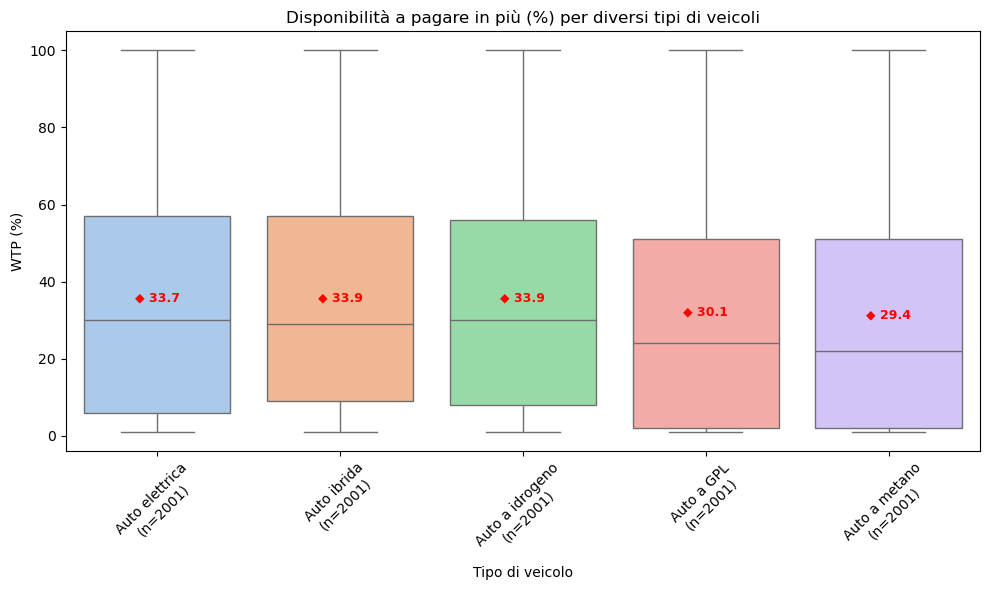

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dati
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Colonne di interesse
wtp2_columns = ["ID", "WTP2_1", "WTP2_2", "WTP2_3", "WTP2_4", "WTP2_5"]
df_wtp2 = df[wtp2_columns].drop_duplicates(subset="ID")

# Trasforma in formato long
df_melted = df_wtp2.melt(var_name="Tipo di veicolo", value_name="WTP (%)")

# Mappa i codici con etichette descrittive
mappa_fig1 = {
    "WTP2_1": "Auto elettrica",
    "WTP2_2": "Auto ibrida",
    "WTP2_3": "Auto a idrogeno",
    "WTP2_4": "Auto a GPL",
    "WTP2_5": "Auto a metano"
}
df_melted["Tipo di veicolo"] = df_melted["Tipo di veicolo"].map(mappa_fig1)

# Rimuove righe con valori nulli
df_melted = df_melted.dropna(subset=["WTP (%)"])

# Conta n osservazioni per tipo di veicolo
counts = df_melted.groupby("Tipo di veicolo", observed=True)['WTP (%)'].count()

# Calcola media per tipo di veicolo
means = df_melted.groupby("Tipo di veicolo", observed=True)['WTP (%)'].mean()

# Ordina tipi di veicolo presenti nel dataset
tipi_presenti = [label for label in mappa_fig1.values() if label in df_melted["Tipo di veicolo"].unique()]
df_melted["Tipo di veicolo"] = pd.Categorical(df_melted["Tipo di veicolo"], categories=tipi_presenti, ordered=True)

# Etichette con n per asse X
new_labels = [f"{label}\n(n={counts[label]})" for label in tipi_presenti]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Tipo di veicolo", y="WTP (%)", data=df_melted, order=tipi_presenti, palette="pastel", legend=False)

# Aggiungi simbolo + media
for i, tipo in enumerate(tipi_presenti):
    media = means.get(tipo)
    if pd.notna(media):
        plt.text(i, media + 1, f"◆ {media:.1f}", color='red', ha='center', fontsize=9, fontweight='bold')

# Layout
plt.title("Disponibilità a pagare in più (%) per diversi tipi di veicoli")
plt.xlabel("Tipo di veicolo")
plt.ylabel("WTP (%)")
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)
plt.tight_layout()
plt.show()


## Figure 2: boxplot willingness to pay alternative fuels

Nota: 

La domanda riporta "Quanto pagherebbe di più il carburante rispetto a un' auto a combustibili tradizionali (diesel, benzina)  per….." 

--> Non contempla la possibilità che un utente possa voler spendere meno

Ad esempio gli intervistati dichiarano di essere disposti a pagare il 30 % in più per usare il GPL, a me sembra strano


C:\Users\gabriele.fambri\AppData\Local\Temp\ipykernel_61596\2823795233.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tipo di carburante", y="WTP (%)", data=df_melted, order=carburanti_presenti, palette="pastel", legend=False)


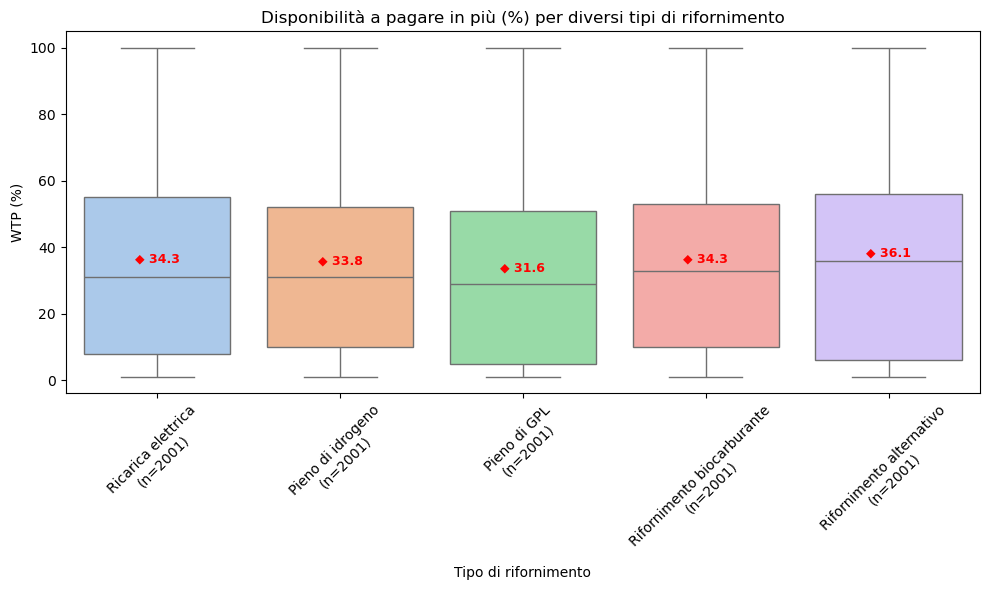

In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dati
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Colonne relative alla WTP per tipo di rifornimento
wtp1_columns = ["ID", "WTP1_1", "WTP1_2", "WTP1_3", "WTP1_4", "WTP1_5"]

# Rimuovi duplicati per ID
df_wtp1 = df[wtp1_columns].drop_duplicates(subset="ID")

# Trasforma in formato long
df_melted = df_wtp1.melt(id_vars="ID", var_name="Codice", value_name="WTP (%)")

# Mappa i codici con etichette leggibili
mappa_fig2 = {
    "WTP1_1": "Ricarica elettrica",
    "WTP1_2": "Pieno di idrogeno",
    "WTP1_3": "Pieno di GPL",
    "WTP1_4": "Rifornimento biocarburante",
    "WTP1_5": "Rifornimento alternativo"
}
df_melted["Tipo di carburante"] = df_melted["Codice"].map(mappa_fig2)

# Rimuovi valori nulli
df_melted = df_melted.dropna(subset=["WTP (%)"])

# Conta osservazioni per tipo di carburante
counts = df_melted.groupby("Tipo di carburante", observed=True)["WTP (%)"].count()

# Calcola media per tipo di carburante
means = df_melted.groupby("Tipo di carburante", observed=True)["WTP (%)"].mean()

# Filtra e ordina i carburanti presenti
carburanti_presenti = [label for label in mappa_fig2.values() if label in df_melted["Tipo di carburante"].unique()]
df_melted["Tipo di carburante"] = pd.Categorical(df_melted["Tipo di carburante"], categories=carburanti_presenti, ordered=True)

# Etichette asse X con n
etichette_x = [f"{tipo}\n(n={counts[tipo]})" for tipo in carburanti_presenti]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Tipo di carburante", y="WTP (%)", data=df_melted, order=carburanti_presenti, palette="pastel", legend=False)

# Aggiungi simbolo e valore della media
for i, tipo in enumerate(carburanti_presenti):
    media = means.get(tipo)
    if pd.notna(media):
        plt.text(i, media + 1, f"◆ {media:.1f}", color='red', ha='center', fontsize=9, fontweight='bold')

# Titolo e layout
plt.title("Disponibilità a pagare in più (%) per diversi tipi di rifornimento")
plt.xlabel("Tipo di rifornimento")
plt.ylabel("WTP (%)")
plt.xticks(ticks=range(len(etichette_x)), labels=etichette_x, rotation=45)
plt.tight_layout()
plt.show()


## Figure 3 WTP alternative vheicle per region

questo grafico non è molto utile perchè fa riporta la media su tutti i tipi di veicoli... ma volevo testare geopandas

Regioni nella mappa: ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna', 'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 'Trentino-Alto Adige/Südtirol', 'Umbria', "Valle d'Aosta/Vallée d'Aoste", 'Veneto']
Regioni nei dati WTP: ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 'Trentino Alto Adige', 'Umbria', "Valle D'Aosta", 'Veneto']


<Figure size 1200x1000 with 0 Axes>

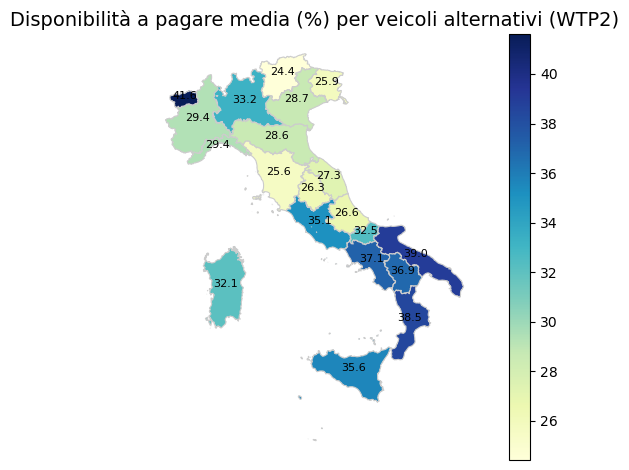

In [4]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Caricamento dati con codici variabili
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Colonne di interesse 
wtp2_columns = ["ID", "regione", "WTP2_1", "WTP2_2", "WTP2_3", "WTP2_4", "WTP2_5"]

# Estrai le colonne rilevanti e rimuovi duplicati per ID
df_wtp2 = df[wtp2_columns].drop_duplicates(subset="ID")

# Calcolo media per regione
df_wtp2_region = df_wtp2.groupby("regione")[["WTP2_1", "WTP2_2", "WTP2_3", "WTP2_4", "WTP2_5"]].mean()

# Calcolo media aggregata WTP2
df_wtp2_region["WTP2_media"] = df_wtp2_region.mean(axis=1)
df_wtp2_region.reset_index(inplace=True)

url = "https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson"
gdf = gpd.read_file(url)

# Verifica che il nome delle regioni combaci tra i due DataFrame
print("Regioni nella mappa:", sorted(gdf['reg_name'].unique()))
print("Regioni nei dati WTP:", sorted(df_wtp2_region['regione'].unique()))

# Mappa per uniformare i nomi delle regioni tra i due DataFrame
mappa_regioni = {
    "Emilia Romagna": "Emilia-Romagna",
    "Friuli Venezia Giulia": "Friuli-Venezia Giulia",
    "Trentino Alto Adige": "Trentino-Alto Adige/Südtirol",
    "Valle D'Aosta": "Valle d'Aosta/Vallée d'Aoste",
    "Sardegna": "Sardegna",
    "Sicilia": "Sicilia",
    "Lazio": "Lazio",
    "Lombardia": "Lombardia",
    "Liguria": "Liguria",
    "Toscana": "Toscana",
    "Veneto": "Veneto",
    "Piemonte": "Piemonte",
    "Puglia": "Puglia",
    "Basilicata": "Basilicata",
    "Calabria": "Calabria",
    "Campania": "Campania",
    "Molise": "Molise",
    "Marche": "Marche",
    "Umbria": "Umbria",
    "Abruzzo": "Abruzzo"
}

# Applica la mappa al DataFrame WTP
df_wtp2_region["regione"] = df_wtp2_region["regione"].replace(mappa_regioni)

# Rinomina la colonna 'reg_name' in 'regione' per il merge
gdf = gdf.rename(columns={"reg_name": "regione"})

# Merge dei dati WTP con la geografia
gdf_merged = gdf.merge(df_wtp2_region, on="regione", how="left")

# Plot della mappa coropletica
plt.figure(figsize=(12, 10))
gdf_merged.plot(column="WTP2_media", cmap="YlGnBu", linewidth=0.8, edgecolor='0.8', legend=True)
plt.title("Disponibilità a pagare media (%) per veicoli alternativi (WTP2)", fontsize=14)
plt.axis("off")

# Annotazioni con valore medio
for idx, row in gdf_merged.iterrows():
    if pd.notnull(row["WTP2_media"]):
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, 
                 f"{row['WTP2_media']:.1f}", ha='center', fontsize=8, color="black")

plt.tight_layout()
plt.show()

## Willingness to pay per regione box plot

Non sembra esserci una correlazione fra regioni più ricche e regioni più povere (WTP Puglia > Piemonte). Infatti come si vede dopo la disponibilità a pagare non sembra essere correlata con il reddito (tranne per i pochi > 100k €)

C:\Users\gabriele.fambri\AppData\Local\Temp\ipykernel_61596\2896542856.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="regione", y="WTP2_media", data=df_box_all, order=regioni_finali, palette="pastel", legend=False)


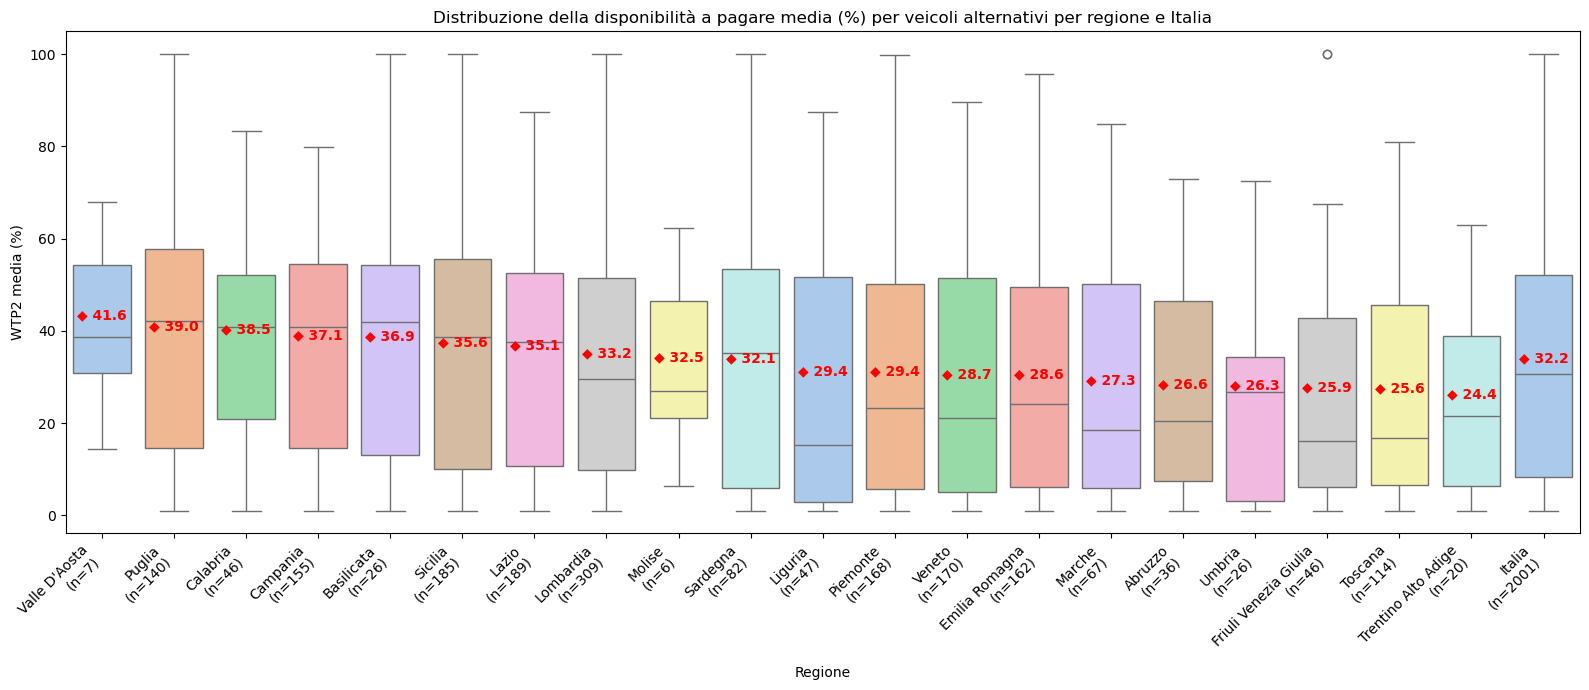

In [5]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dati
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Colonne di interesse
wtp2_columns = ["ID", "regione", "WTP2_1", "WTP2_2", "WTP2_3", "WTP2_4", "WTP2_5"]
df_wtp2 = df[wtp2_columns].drop_duplicates(subset="ID")

# Calcola la media per individuo
df_wtp2["WTP2_media"] = df_wtp2[["WTP2_1", "WTP2_2", "WTP2_3", "WTP2_4", "WTP2_5"]].mean(axis=1)

# Rimuovi righe incomplete
df_box = df_wtp2.dropna(subset=["regione", "WTP2_media"])

# Conta intervistati per regione
n_intervistati = df_box.groupby("regione", observed=True)["ID"].nunique()

# Ordina le regioni per media decrescente
regioni_ordinate = df_box.groupby("regione", observed=True)["WTP2_media"].mean().sort_values(ascending=False).index.tolist()

# Etichette asse X con (n=...)
etichette_x = [f"{regione}\n(n={n_intervistati[regione]})" for regione in regioni_ordinate]

# Aggiungi la riga per Italia
df_box_italia = df_box.copy()
df_box_italia["regione"] = "Italia"
df_box_all = pd.concat([df_box, df_box_italia], ignore_index=True)

# Etichette e ordine finale
regioni_finali = regioni_ordinate + ["Italia"]
n_italia = df_box_italia["ID"].nunique()
etichette_x_finali = etichette_x + [f"Italia\n(n={n_italia})"]

# Calcola media per ciascuna regione + Italia
medie_regione = df_box_all.groupby("regione", observed=True)["WTP2_media"].mean()

# Plot
plt.figure(figsize=(16, 7))
sns.boxplot(x="regione", y="WTP2_media", data=df_box_all, order=regioni_finali, palette="pastel", legend=False)

# Aggiungi simbolo e valore della media
for i, regione in enumerate(regioni_finali):
    media = medie_regione.get(regione)
    if pd.notna(media):
        plt.text(i, media + 1, f"◆ {media:.1f}", color='red', ha='center', fontsize=10, fontweight='bold')

# Etichette e layout
plt.title("Distribuzione della disponibilità a pagare media (%) per veicoli alternativi per regione e Italia")
plt.xlabel("Regione")
plt.ylabel("WTP2 media (%)")
plt.xticks(ticks=range(len(etichette_x_finali)), labels=etichette_x_finali, rotation=45, ha='right')
plt.tight_layout()
plt.show()


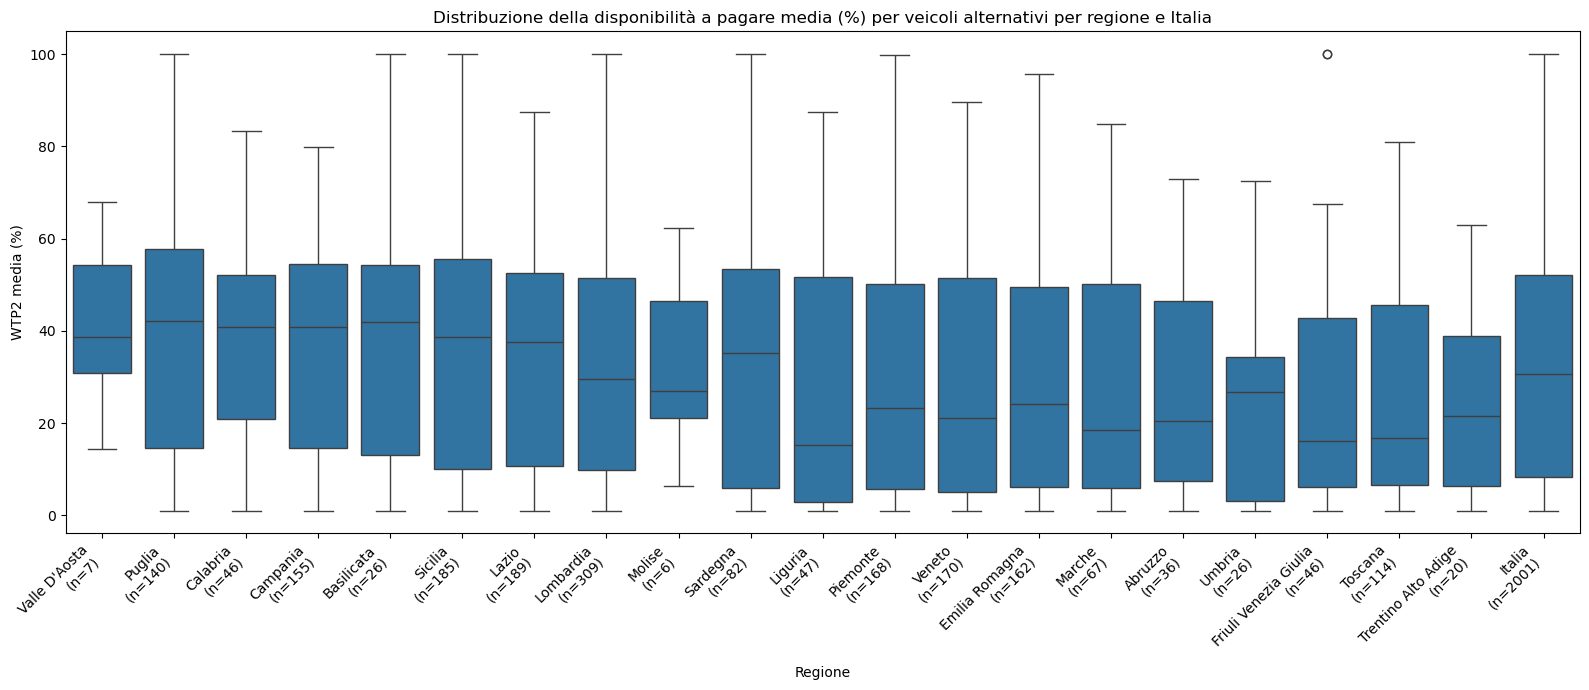

In [6]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dati con codici variabili
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Boxplot della willingness to pay (WTP2_media) per regione, con colonna Italia e numero intervistati

# Unisci i dati WTP2 con i dati geografici per avere la regione associata a ogni ID
wtp2_columns = ["ID", "regione", "WTP2_1", "WTP2_2", "WTP2_3", "WTP2_4", "WTP2_5"]
df_wtp2 = df[wtp2_columns].drop_duplicates(subset="ID")

# Calcola la media WTP2 per ogni individuo
df_wtp2["WTP2_media"] = df_wtp2[["WTP2_1", "WTP2_2", "WTP2_3", "WTP2_4", "WTP2_5"]].mean(axis=1)

# Rimuovi righe senza regione o senza dati WTP2_media
df_box = df_wtp2.dropna(subset=["regione", "WTP2_media"])

 # Conta il numero di intervistati per regione
n_intervistati = df_box.groupby("regione")["ID"].nunique()

# Ordina le regioni per media decrescente (opzionale, per leggibilità)
regioni_ordinate = df_box.groupby("regione")["WTP2_media"].mean().sort_values(ascending=False).index.tolist()

# Crea etichette con n
etichette_x = [f"{regione}\n(n={n_intervistati[regione]})" for regione in regioni_ordinate]

# Aggiungi la colonna Italia
df_box_italia = df_box.copy()
df_box_italia["regione"] = "Italia"

# Unisci i dati
df_box_all = pd.concat([df_box, df_box_italia], ignore_index=True)

# Aggiorna etichette e ordine
regioni_finali = regioni_ordinate + ["Italia"]
n_italia = df_box_italia["ID"].nunique()
etichette_x_finali = etichette_x + [f"Italia\n(n={n_italia})"]

plt.figure(figsize=(16, 7))
sns.boxplot(x="regione", y="WTP2_media", data=df_box_all, order=regioni_finali)
plt.title("Distribuzione della disponibilità a pagare media (%) per veicoli alternativi per regione e Italia")
plt.xlabel("Regione")
plt.ylabel("WTP2 media (%)")
plt.xticks(ticks=range(len(etichette_x_finali)), labels=etichette_x_finali, rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Box plot fascia di reddito (EV)

Mi sarei aspettato una dipendenza maggiore dal reddito. Anche qui sarebbe da incrociare i dati con altre variabili di controllo, come l'età, livello di istruzione

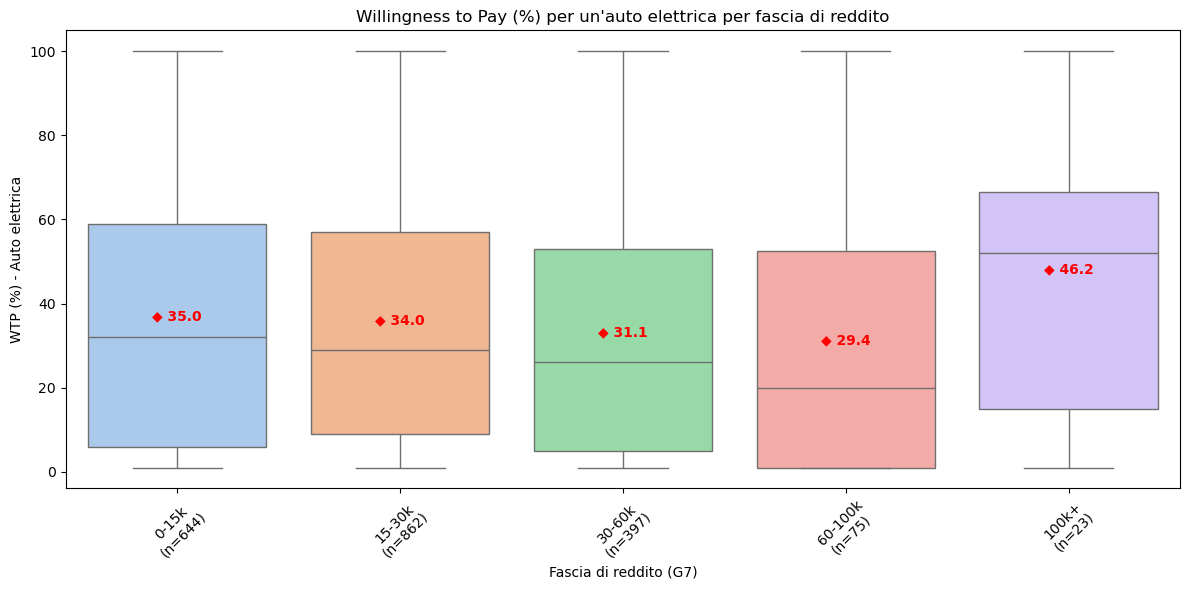

In [7]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignora FutureWarning (facoltativo)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Caricamento dati
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona le colonne necessarie e rimuovi duplicati
columns_needed = ["ID", "G7", "WTP2_1"]
df_subset = df[columns_needed].drop_duplicates(subset="ID")

# Rimuovi righe con valori mancanti
df_subset = df_subset.dropna(subset=["G7", "WTP2_1"])

# Assegna la colonna G7 come fascia di reddito
df_subset["Reddito"] = df_subset["G7"]

# Ordina le fasce di reddito
fasce_ord = ["0-15k", "15-30k", "30-60k", "60-100k", "100k+"]
df_subset["Reddito"] = pd.Categorical(df_subset["Reddito"], categories=fasce_ord, ordered=True)

# Rimuovi eventuali "N/A"
df_subset = df_subset[df_subset["Reddito"].notna() & (df_subset["Reddito"] != "N/A")]

# Conta i casi per fascia (con observed=True per evitare warning)
counts = df_subset.groupby("Reddito", observed=True)["WTP2_1"].count()
etichette_x = [f"{fascia}\n(n={counts.get(fascia, 0)})" for fascia in fasce_ord]

# Calcola media per fascia (con observed=True)
medie = df_subset.groupby("Reddito", observed=True)["WTP2_1"].mean()

# Crea il boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Reddito", y="WTP2_1", data=df_subset, palette="pastel", legend=False)

# Aggiungi la media come simbolo + testo
for i, fascia in enumerate(fasce_ord):
    media = medie.get(fascia)
    if pd.notna(media):
        plt.text(i, media + 1, f"◆ {media:.1f}", color='red', ha='center', fontsize=10, fontweight='bold')

# Layout e label
plt.title("Willingness to Pay (%) per un'auto elettrica per fascia di reddito")
plt.xlabel("Fascia di reddito (G7)")
plt.ylabel("WTP (%) - Auto elettrica")
plt.xticks(ticks=range(len(etichette_x)), labels=etichette_x, rotation=45)
plt.tight_layout()
plt.show()


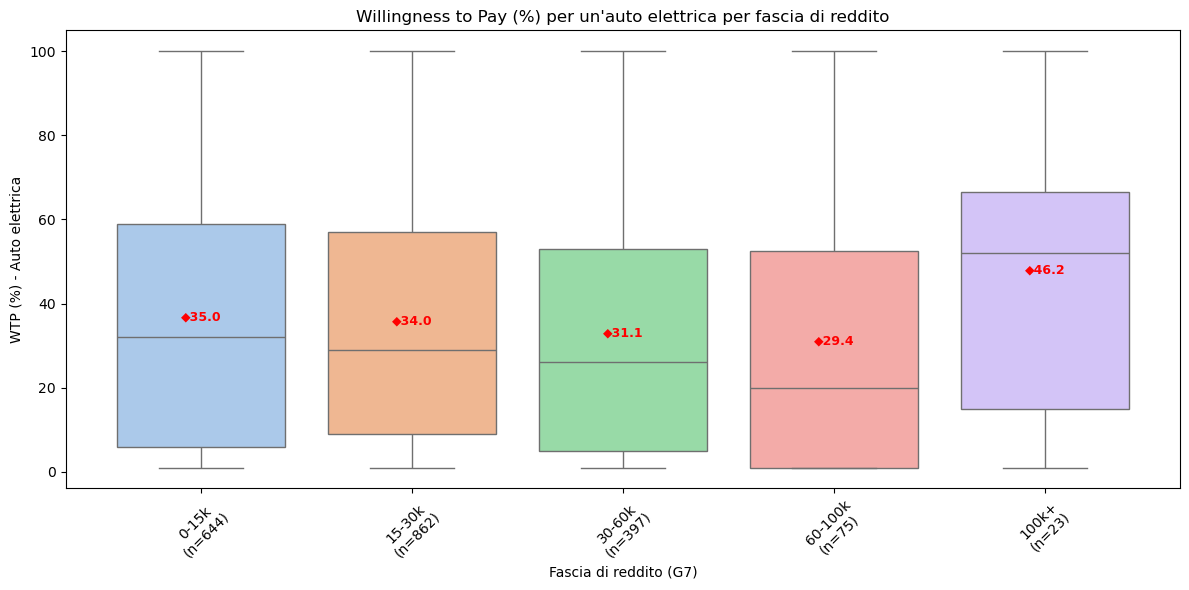

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dati
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Selezione e pulizia
columns_needed = ["ID", "G7", "WTP2_1"]
df_subset = df[columns_needed].drop_duplicates(subset="ID")
df_subset = df_subset.dropna(subset=["G7", "WTP2_1"])

# Assegna fascia di reddito
df_subset["Reddito"] = df_subset["G7"]

# Ordine logico delle fasce
fasce_ord = ["0-15k", "15-30k", "30-60k", "60-100k", "100k+"]
df_subset["Reddito"] = pd.Categorical(df_subset["Reddito"], categories=fasce_ord, ordered=True)

# Rimuovi eventuali "N/A"
df_subset = df_subset[df_subset["Reddito"].notna() & (df_subset["Reddito"] != "N/A")]

# Conta n per etichette
#counts = df_subset.groupby("Reddito")["WTP2_1"].count()
counts = df_subset.groupby("Reddito", observed=True)["WTP2_1"].count()
etichette_x = [f"{fascia}\n(n={counts.get(fascia, 0)})" for fascia in fasce_ord]

# Calcola media per ciascuna fascia
#medie = df_subset.groupby("Reddito")["WTP2_1"].mean()
medie = df_subset.groupby("Reddito", observed=True)["WTP2_1"].mean()

# Boxplot
plt.figure(figsize=(12, 6))
#sns.boxplot(x="Reddito", y="WTP2_1", data=df_subset, palette="pastel")
sns.boxplot(x="Reddito", y="WTP2_1", data=df_subset, palette="pastel", legend=False)

# Aggiungi media sopra ogni box
for i, fascia in enumerate(fasce_ord):
    media = medie.get(fascia)
    if pd.notna(media):
        plt.scatter(i, media, color='red', marker='', zorder=5)
        plt.text(i, media + 1, f"◆{media:.1f}", color='red', ha='center', fontsize=9, fontweight='bold')

plt.title("Willingness to Pay (%) per un'auto elettrica per fascia di reddito")
plt.xlabel("Fascia di reddito (G7)")
plt.ylabel("WTP (%) - Auto elettrica")
plt.xticks(ticks=range(len(etichette_x)), labels=etichette_x, rotation=45)
plt.tight_layout()
plt.show()





## WTP chi ha un veicolo elettrico vs gli altri (ERRTATO)
Questo grafico è errato perchè non vengono filtrati i valori con ID uguale

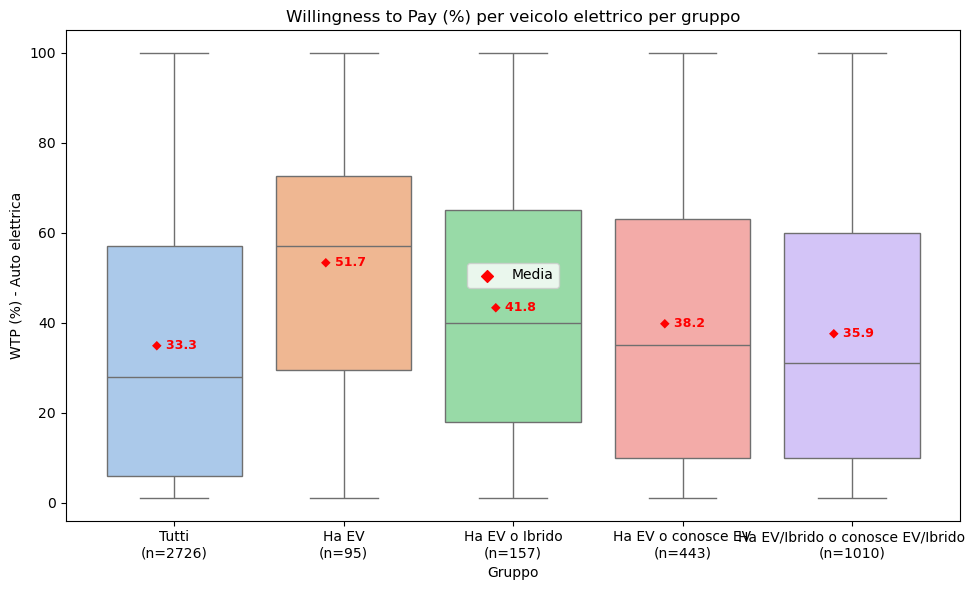

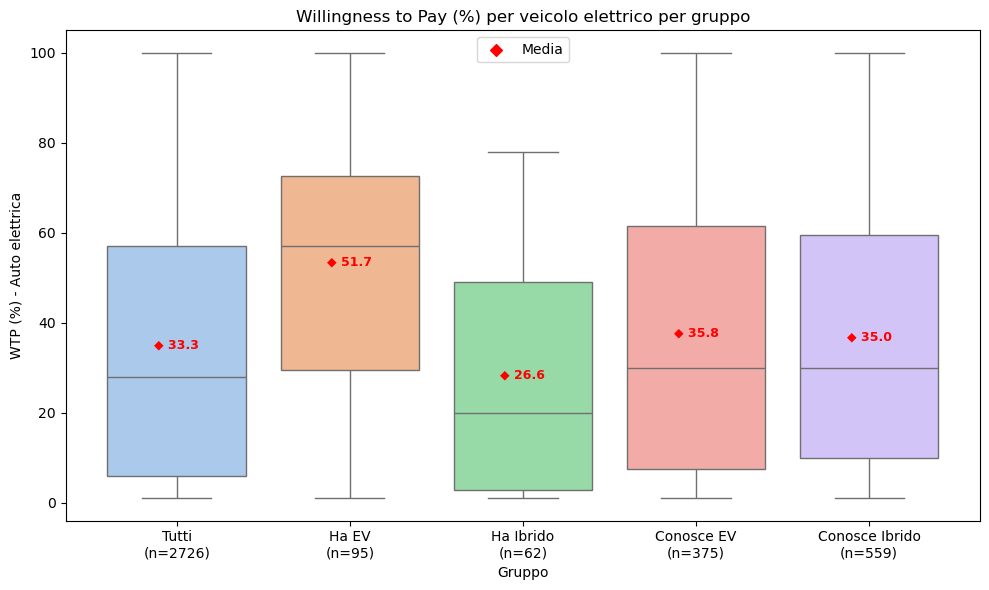

In [9]:
# Importa le librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dati
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona le colonne rilevanti ed elimina duplicati per ID
columns_needed = ["ID", 'TA7', 'SE2', "WTP2_1"]
df_subset = df[columns_needed].drop_duplicates()
df_box = df_subset.copy()

# Definizione delle condizioni
cond_elettrico = df_box['TA7'] == 'Elettrico'
cond_ibrido = df_box['TA7'] == 'Ibrido'
cond_se2_elettrico = df_box['SE2'] == 'Completamente elettrico'
cond_se2_ibrido = df_box['SE2'] == 'Elettrico ibrido plug-in'

mask_all = df_box['WTP2_1'].notna()
mask_elettrico = cond_elettrico & df_box['WTP2_1'].notna()
mask_elettrico_ibrido = (cond_elettrico | cond_ibrido) & df_box['WTP2_1'].notna()
mask_elettrico_o_conosce = (cond_elettrico | cond_se2_elettrico) & df_box['WTP2_1'].notna()
mask_elettrico_ibrido_o_conosce = (cond_elettrico | cond_ibrido | cond_se2_elettrico | cond_se2_ibrido) & df_box['WTP2_1'].notna()
mask_ibrido = cond_ibrido & df_box['WTP2_1'].notna()
mask_elettrico_conosce = cond_se2_elettrico & df_box['WTP2_1'].notna()
mask_ibrido_conosce = cond_se2_ibrido & df_box['WTP2_1'].notna()


# Gruppi per la prima figura
gruppi1 = [
    ('Tutti', mask_all),
    ('Ha EV', mask_elettrico),
    ('Ha EV o Ibrido', mask_elettrico_ibrido),
    ('Ha EV o conosce EV', mask_elettrico_o_conosce),
    ('Ha EV/Ibrido o conosce EV/Ibrido', mask_elettrico_ibrido_o_conosce)
]

# Calcolo dati e medie
etichette, means, dati = [], [], []
for nome, mask in gruppi1:
    vals = df_box.loc[mask, 'WTP2_1']
    n = len(vals)
    media = vals.mean()
    etichette.append(f"{nome}\n(n={n})")
    means.append(media)
    dati.append(vals)

# Costruzione DataFrame per plot
df_plot1 = pd.DataFrame({
    'WTP (%)': pd.concat(dati, ignore_index=True),
    'Gruppo': pd.Series([lab for lab, d in zip(etichette, dati) for _ in range(len(d))])
})

# Plot Figura 1
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gruppo', y='WTP (%)', data=df_plot1, palette='pastel')
plt.scatter(x=range(len(etichette)), y=means, color='red', marker='D', label='Media')

# Annotazioni delle medie
for i, mean in enumerate(means):
    if pd.notna(mean):
        plt.text(i, mean + 1, f"◆ {mean:.1f}", color='red', ha='center', fontsize=9, fontweight='bold')


plt.title('Willingness to Pay (%) per veicolo elettrico per gruppo')
plt.xlabel('Gruppo')
plt.ylabel('WTP (%) - Auto elettrica')
plt.legend()
plt.tight_layout()
plt.show()


# Gruppi per la seconda figura
gruppi2 = [
    ('Tutti', mask_all),
    ('Ha EV', mask_elettrico),
    ('Ha Ibrido', mask_ibrido),
    ('Conosce EV', mask_elettrico_conosce),
    ('Conosce Ibrido', mask_ibrido_conosce)
]

# Calcolo dati e medie
etichette, means, dati = [], [], []
for nome, mask in gruppi2:
    vals = df_box.loc[mask, 'WTP2_1']
    n = len(vals)
    media = vals.mean()
    etichette.append(f"{nome}\n(n={n})")
    means.append(media)
    dati.append(vals)

# Costruzione DataFrame per plot
df_plot2 = pd.DataFrame({
    'WTP (%)': pd.concat(dati, ignore_index=True),
    'Gruppo': pd.Series([lab for lab, d in zip(etichette, dati) for _ in range(len(d))])
})

# Gruppi per la seconda figura
gruppi2 = [
    ('Tutti', mask_all),
    ('Ha EV', mask_elettrico),
    ('Ha Ibrido', mask_ibrido),
    ('Conosce EV', mask_elettrico_conosce),
    ('Conosce Ibrido', mask_ibrido_conosce)
]

# Calcolo dati e medie
etichette, means, dati = [], [], []
for nome, mask in gruppi2:
    vals = df_box.loc[mask, 'WTP2_1']
    n = len(vals)
    media = vals.mean()
    etichette.append(f"{nome}\n(n={n})")
    means.append(media)
    dati.append(vals)

# Costruzione DataFrame per plot
df_plot2 = pd.DataFrame({
    'WTP (%)': pd.concat(dati, ignore_index=True),
    'Gruppo': pd.Series([lab for lab, d in zip(etichette, dati) for _ in range(len(d))])
})

# Plot Figura 2
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gruppo', y='WTP (%)', data=df_plot2, palette='pastel')
plt.scatter(x=range(len(etichette)), y=means, color='red', marker='D', label='Media')

# Annotazioni delle medie
for i, mean in enumerate(means):
    if pd.notna(mean):
        plt.text(i, mean + 1, f"◆ {mean:.1f}", color='red', ha='center', fontsize=9, fontweight='bold')


plt.title('Willingness to Pay (%) per veicolo elettrico per gruppo')
plt.xlabel('Gruppo')
plt.ylabel('WTP (%) - Auto elettrica')
plt.legend()
plt.tight_layout()
plt.show()



## WTP chi ha un veicolo elettrico vs gli altri (CORRETTO)

In questo grafico vengono filtrati i valori con ID uguale

Dai risultati si vede che la WTP cambia se hai già un auto elettrica. Se hai un auto ibrida non cambia la WTP, se conosci qualcuno che ha un elettrica o un'ibrida non cambia la tua WTP (o almenno non molto, da testare la significatività)


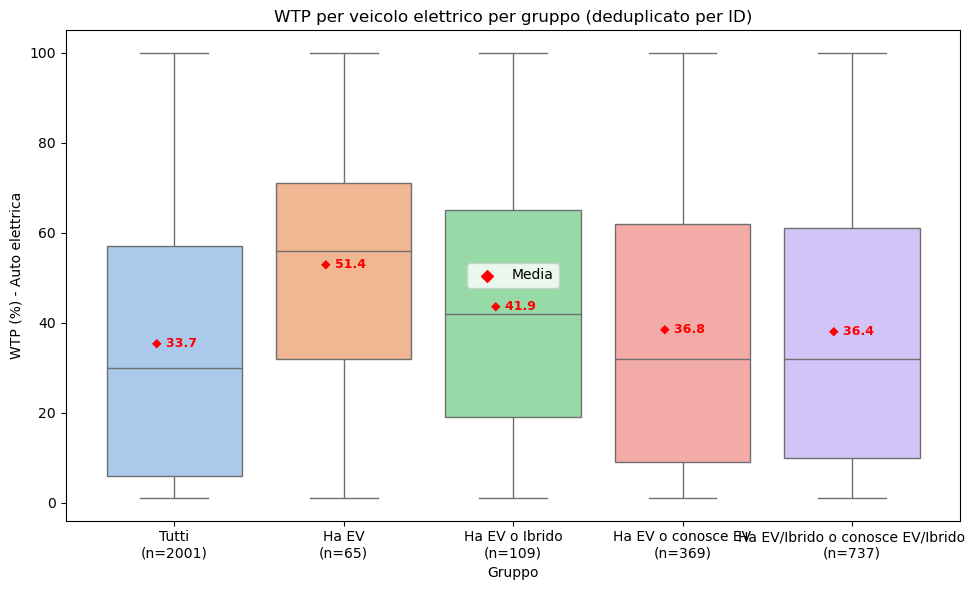

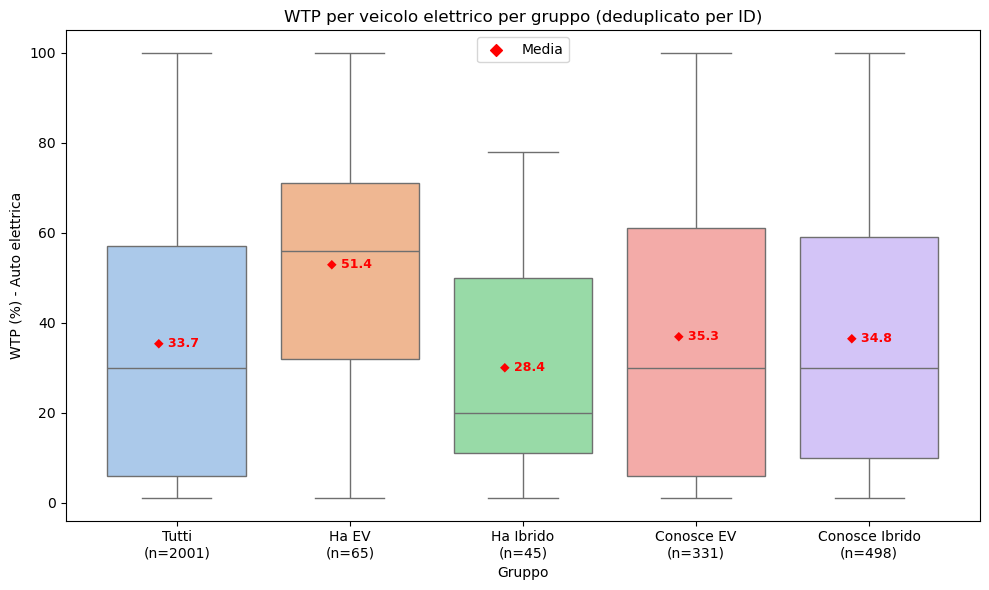

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica il file
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona solo le colonne necessarie e rimuovi righe con WTP2_1 mancante
columns_needed = ["ID", "TA7", "SE2", "WTP2_1"]
df_subset = df[columns_needed].dropna(subset=["WTP2_1"])

# Aggrega per ID (deduplicazione logica)
agg_df = df_subset.groupby("ID").agg({
    "WTP2_1": "first",  # ogni ID ha un solo valore valido
    "TA7": lambda x: list(set(x.dropna())),
    "SE2": lambda x: list(set(x.dropna()))
}).reset_index()

# Crea colonne booleane per appartenenza ai gruppi
agg_df["Ha_Elettrico"] = agg_df["TA7"].apply(lambda x: "Elettrico" in x)
agg_df["Ha_Ibrido"] = agg_df["TA7"].apply(lambda x: "Ibrido" in x)
agg_df["Conosce_Elettrico"] = agg_df["SE2"].apply(lambda x: "Completamente elettrico" in x)
agg_df["Conosce_Ibrido"] = agg_df["SE2"].apply(lambda x: "Elettrico ibrido plug-in" in x)

# ------------------------
# 📊 FIGURA 1
# ------------------------
gruppi1 = {
    "Tutti": [True] * len(agg_df),
    "Ha EV": agg_df["Ha_Elettrico"],
    "Ha EV o Ibrido": agg_df["Ha_Elettrico"] | agg_df["Ha_Ibrido"],
    "Ha EV o conosce EV": agg_df["Ha_Elettrico"] | agg_df["Conosce_Elettrico"],
    "Ha EV/Ibrido o conosce EV/Ibrido": (
        agg_df["Ha_Elettrico"] | agg_df["Ha_Ibrido"] |
        agg_df["Conosce_Elettrico"] | agg_df["Conosce_Ibrido"]
    )
}

# Prepara dati per il plot
etichette, means, dati = [], [], []
for nome, mask in gruppi1.items():
    vals = agg_df.loc[mask, "WTP2_1"]
    n = vals.count()
    media = vals.mean() if n > 0 else float('nan')
    etichette.append(f"{nome}\n(n={n})")
    means.append(media)
    dati.append(vals)

# Costruzione DataFrame per boxplot
df_plot = pd.DataFrame({
    "WTP (%)": pd.concat(dati, ignore_index=True),
    "Gruppo": pd.Series([lab for lab, d in zip(etichette, dati) for _ in range(len(d))])
})

# Plot figura 1
plt.figure(figsize=(10,6))
sns.boxplot(x="Gruppo", y="WTP (%)", data=df_plot, palette="pastel")
plt.scatter(range(len(means)), means, color='red', marker='D', label='Media')

# Aggiungi simbolo e media sopra i box
for i, mean in enumerate(means):
    if pd.notna(mean):
        plt.text(i, mean + 1, f"◆ {mean:.1f}", color='red', ha='center', fontsize=9, fontweight='bold')

plt.title("WTP per veicolo elettrico per gruppo (deduplicato per ID)")
plt.xlabel("Gruppo")
plt.ylabel("WTP (%) - Auto elettrica")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------
# 📊 FIGURA 2
# ------------------------
gruppi2 = {
    "Tutti": [True] * len(agg_df),
    "Ha EV": agg_df["Ha_Elettrico"],
    "Ha Ibrido": agg_df["Ha_Ibrido"],
    "Conosce EV": agg_df["Conosce_Elettrico"],
    "Conosce Ibrido": agg_df["Conosce_Ibrido"]
}

etichette, means, dati = [], [], []
for nome, mask in gruppi2.items():
    vals = agg_df.loc[mask, "WTP2_1"]
    n = vals.count()
    media = vals.mean() if n > 0 else float('nan')
    etichette.append(f"{nome}\n(n={n})")
    means.append(media)
    dati.append(vals)

# Costruzione DataFrame per boxplot
df_plot2 = pd.DataFrame({
    "WTP (%)": pd.concat(dati, ignore_index=True),
    "Gruppo": pd.Series([lab for lab, d in zip(etichette, dati) for _ in range(len(d))])
})

# Plot figura 2
plt.figure(figsize=(10,6))
sns.boxplot(x="Gruppo", y="WTP (%)", data=df_plot2, palette="pastel")
plt.scatter(range(len(means)), means, color='red', marker='D', label='Media')

# Aggiungi simbolo e media sopra i box
for i, mean in enumerate(means):
    if pd.notna(mean):
        plt.text(i, mean + 1, f"◆ {mean:.1f}", color='red', ha='center', fontsize=9, fontweight='bold')

plt.title("WTP per veicolo elettrico per gruppo (deduplicato per ID)")
plt.xlabel("Gruppo")
plt.ylabel("WTP (%) - Auto elettrica")
plt.legend()
plt.tight_layout()
plt.show()


## WTP ricarica VS WTP mezzo (EV)
r = 0.75 p < 0.001
buona correlazione e significativa

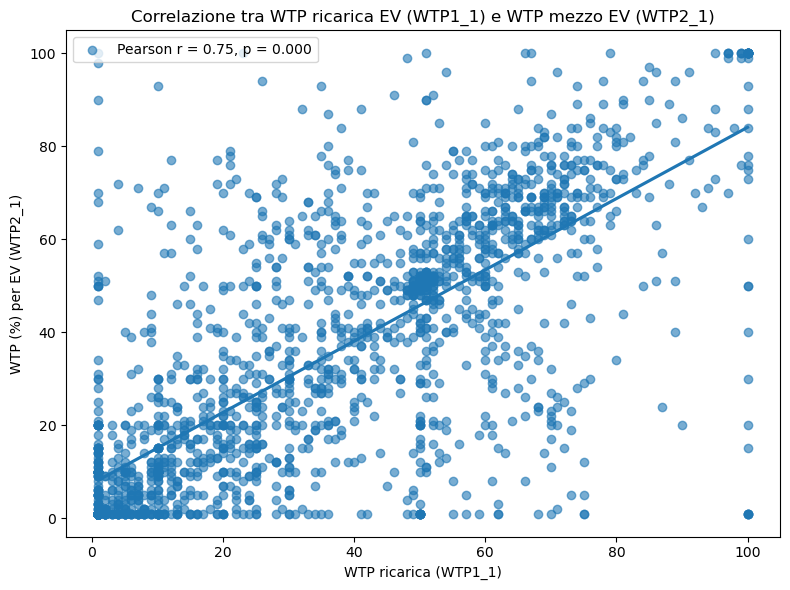

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Caricamento del file
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Selezione e pulizia dei dati
df_subset = df[["ID", "WTP1_1", "WTP2_1"]].dropna(subset=["WTP1_1", "WTP2_1"])
df_unique = df_subset.drop_duplicates(subset="ID")

# Calcolo della correlazione Pearson
r, p = pearsonr(df_unique["WTP1_1"], df_unique["WTP2_1"])

# Scatter plot con linea di regressione
plt.figure(figsize=(8, 6))
sns.regplot(x="WTP1_1", y="WTP2_1", data=df_unique, ci=None, scatter_kws={'alpha':0.6})
plt.title("Correlazione tra WTP ricarica EV (WTP1_1) e WTP mezzo EV (WTP2_1)")
plt.xlabel("WTP ricarica (WTP1_1)")
plt.ylabel("WTP (%) per EV (WTP2_1)")
plt.legend([f"Pearson r = {r:.2f}, p = {p:.3f}"])
plt.tight_layout()
plt.show()

## Coscienza ambientale VS WTP EV

r = 0.15 p < 0.001

Debole correlazione positiva ma statisticamente significativa

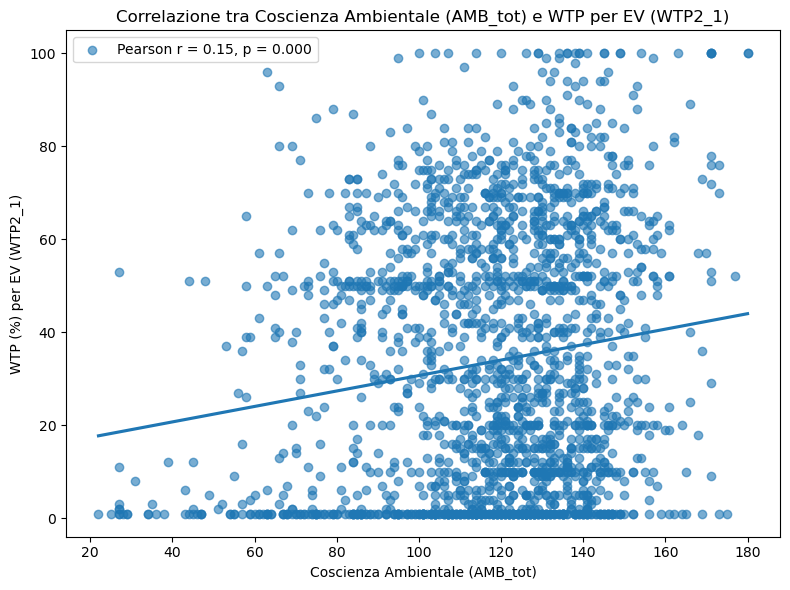

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Caricamento del file
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Selezione e pulizia dei dati
df_subset = df[["ID", "AMB_tot", "WTP2_1"]].dropna(subset=["AMB_tot", "WTP2_1"])
df_unique = df_subset.drop_duplicates(subset="ID")

# Calcolo della correlazione Pearson
r, p = pearsonr(df_unique["AMB_tot"], df_unique["WTP2_1"])

# Scatter plot con linea di regressione
plt.figure(figsize=(8, 6))
sns.regplot(x="AMB_tot", y="WTP2_1", data=df_unique, ci=None, scatter_kws={'alpha':0.6})
plt.title("Correlazione tra Coscienza Ambientale (AMB_tot) e WTP per EV (WTP2_1)")
plt.xlabel("Coscienza Ambientale (AMB_tot)")
plt.ylabel("WTP (%) per EV (WTP2_1)")
plt.legend([f"Pearson r = {r:.2f}, p = {p:.3f}"])
plt.tight_layout()
plt.show()

## Fiducia informazioni VS WTP EV

r = 0.28 p < 0.001

Moderata correlazione positiva (maggiore che per coscienza ambientale) e statisticamente significativa

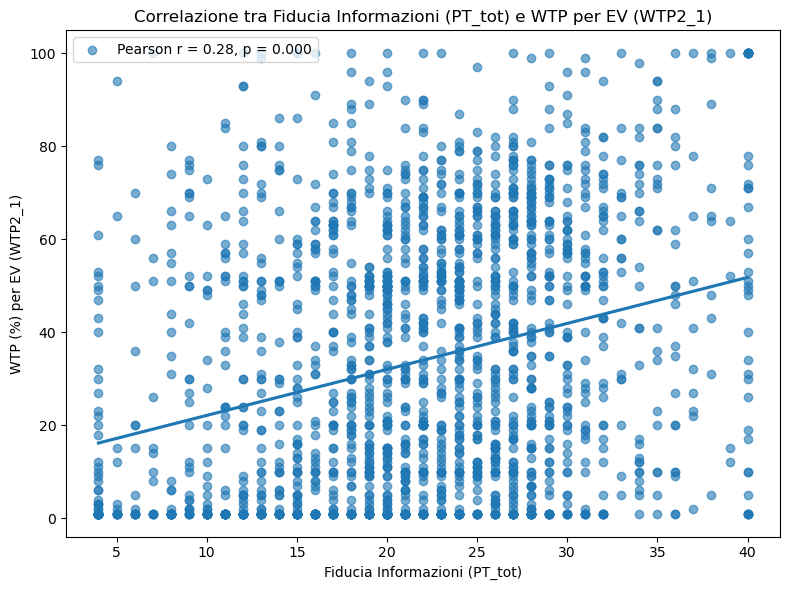

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Caricamento del file
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Selezione e pulizia dei dati
df_subset = df[["ID", "PT_tot", "WTP2_1"]].dropna(subset=["PT_tot", "WTP2_1"])
df_unique = df_subset.drop_duplicates(subset="ID")

# Calcolo della correlazione Pearson
r, p = pearsonr(df_unique["PT_tot"], df_unique["WTP2_1"])

# Scatter plot con linea di regressione
plt.figure(figsize=(8, 6))
sns.regplot(x="PT_tot", y="WTP2_1", data=df_unique, ci=None, scatter_kws={'alpha':0.6})
plt.title("Correlazione tra Fiducia Informazioni (PT_tot) e WTP per EV (WTP2_1)")
plt.xlabel("Fiducia Informazioni (PT_tot)")
plt.ylabel("WTP (%) per EV (WTP2_1)")
plt.legend([f"Pearson r = {r:.2f}, p = {p:.3f}"])
plt.tight_layout()
plt.show()

## Fiducia informazioni VS Coscienza ambientale

r = 0.39 p < 0.001

Moderata correlazione positiva e statisticamente significativa

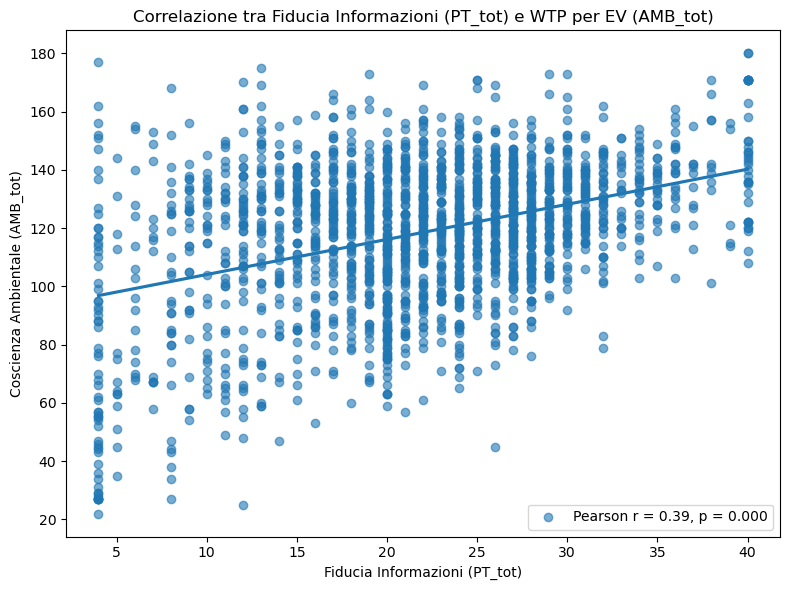

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Caricamento del file
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Selezione e pulizia dei dati
df_subset = df[["ID", "PT_tot", "AMB_tot"]].dropna(subset=["PT_tot", "AMB_tot"])
df_unique = df_subset.drop_duplicates(subset="ID")

# Calcolo della correlazione Pearson
r, p = pearsonr(df_unique["PT_tot"], df_unique["AMB_tot"])

# Scatter plot con linea di regressione
plt.figure(figsize=(8, 6))
sns.regplot(x="PT_tot", y="AMB_tot", data=df_unique, ci=None, scatter_kws={'alpha':0.6})
plt.title("Correlazione tra Fiducia Informazioni (PT_tot) e WTP per EV (AMB_tot)")
plt.xlabel("Fiducia Informazioni (PT_tot)")
plt.ylabel("Coscienza Ambientale (AMB_tot)")
plt.legend([f"Pearson r = {r:.2f}, p = {p:.3f}"])
plt.tight_layout()
plt.show()

## ATE vs WTP fuels

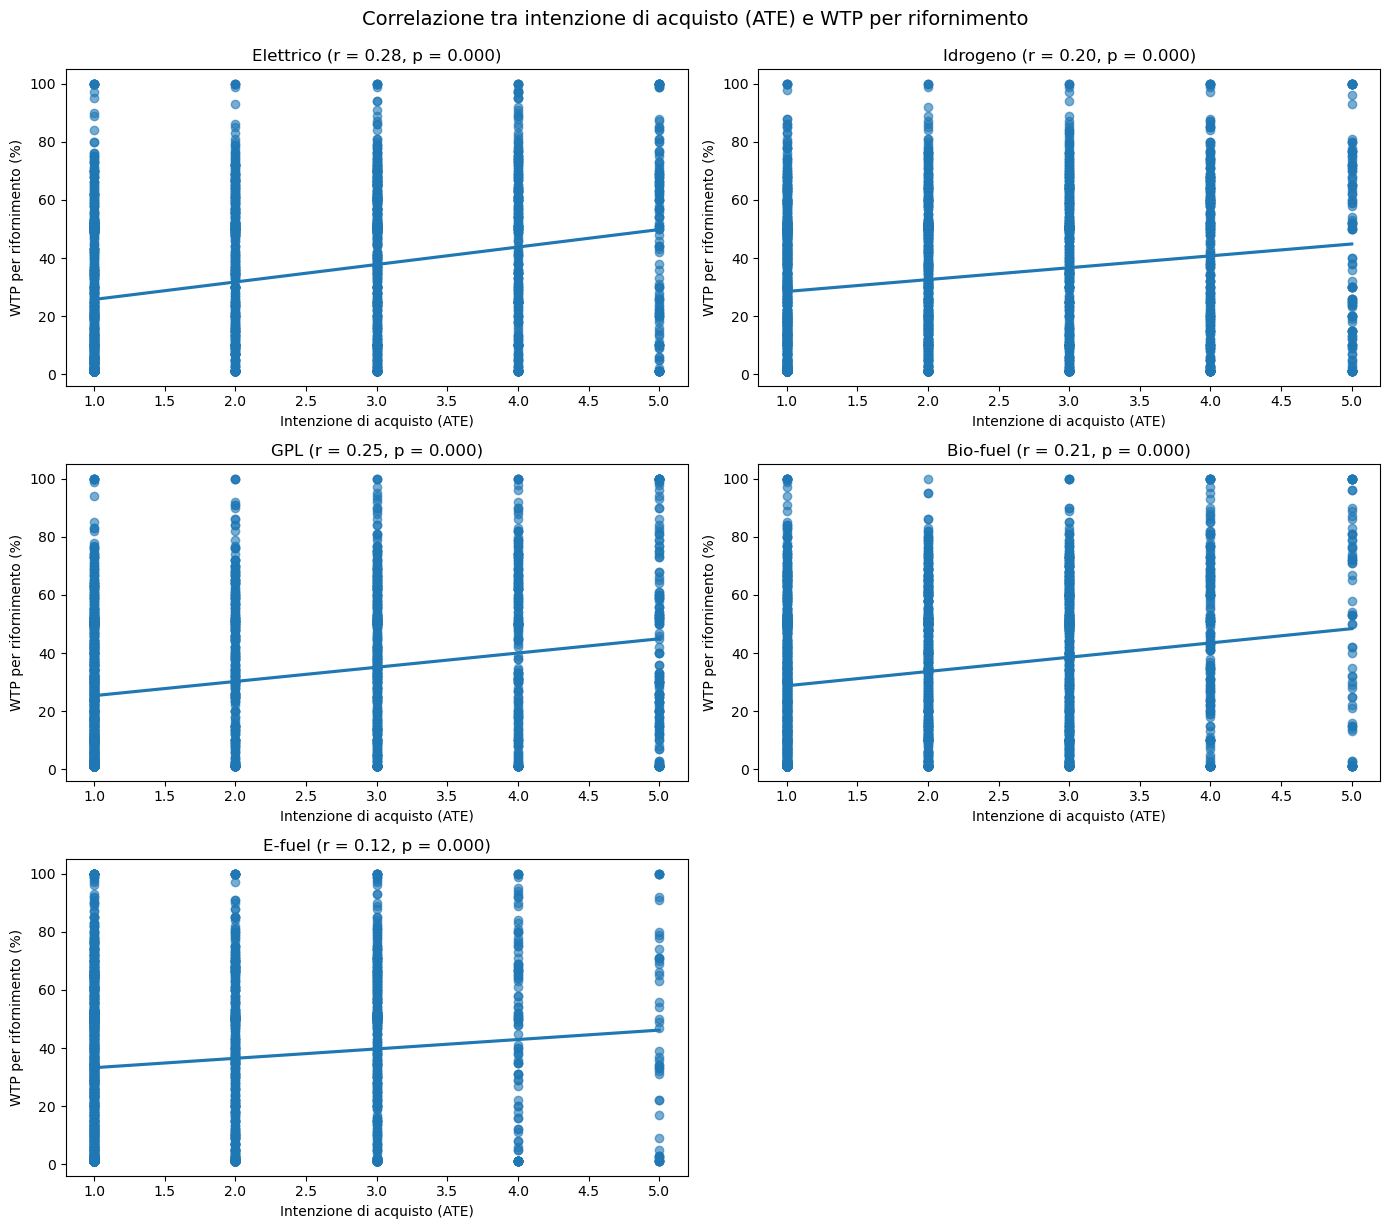

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Caricamento del file
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona solo le colonne necessarie
columns = [
    "ID",
    "ATE_1", "ATE_3", "ATE_4", "ATE_5", "ATE_6",
    "WTP1_1", "WTP1_2", "WTP1_3", "WTP1_4", "WTP1_5"
]
df_subset = df[columns].dropna()

# Rimuovi duplicati per ID
df_unique = df_subset.drop_duplicates(subset="ID")

# Mappatura per etichette leggibili
mappa = {
    "Elettrico": ("ATE_1", "WTP1_1"),
    "Idrogeno": ("ATE_3", "WTP1_2"),
    "GPL": ("ATE_4", "WTP1_3"),
    "Bio-fuel": ("ATE_5", "WTP1_4"),
    "E-fuel": ("ATE_6", "WTP1_5")
}

# Setup figure
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

# Loop sui tipi di veicolo
for i, (label, (ate, wtp)) in enumerate(mappa.items()):
    ax = axes[i]
    x = df_unique[ate]
    y = df_unique[wtp]

    # Rimuovi NA per sicurezza
    mask = x.notna() & y.notna()
    x = x[mask]
    y = y[mask]

    # Calcolo r e p
    r, p = pearsonr(x, y)

    # Plot
    sns.regplot(x=x, y=y, ax=ax, ci=None, scatter_kws={'alpha': 0.6})
    ax.set_title(f"{label} (r = {r:.2f}, p = {p:.3f})")
    ax.set_xlabel("Intenzione di acquisto (ATE)")
    ax.set_ylabel("WTP per rifornimento (%)")

# Rimuovi plot vuoto se dispari
if len(mappa) < len(axes):
    for j in range(len(mappa), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Correlazione tra intenzione di acquisto (ATE) e WTP per rifornimento", fontsize=14, y=1.02)
plt.show()

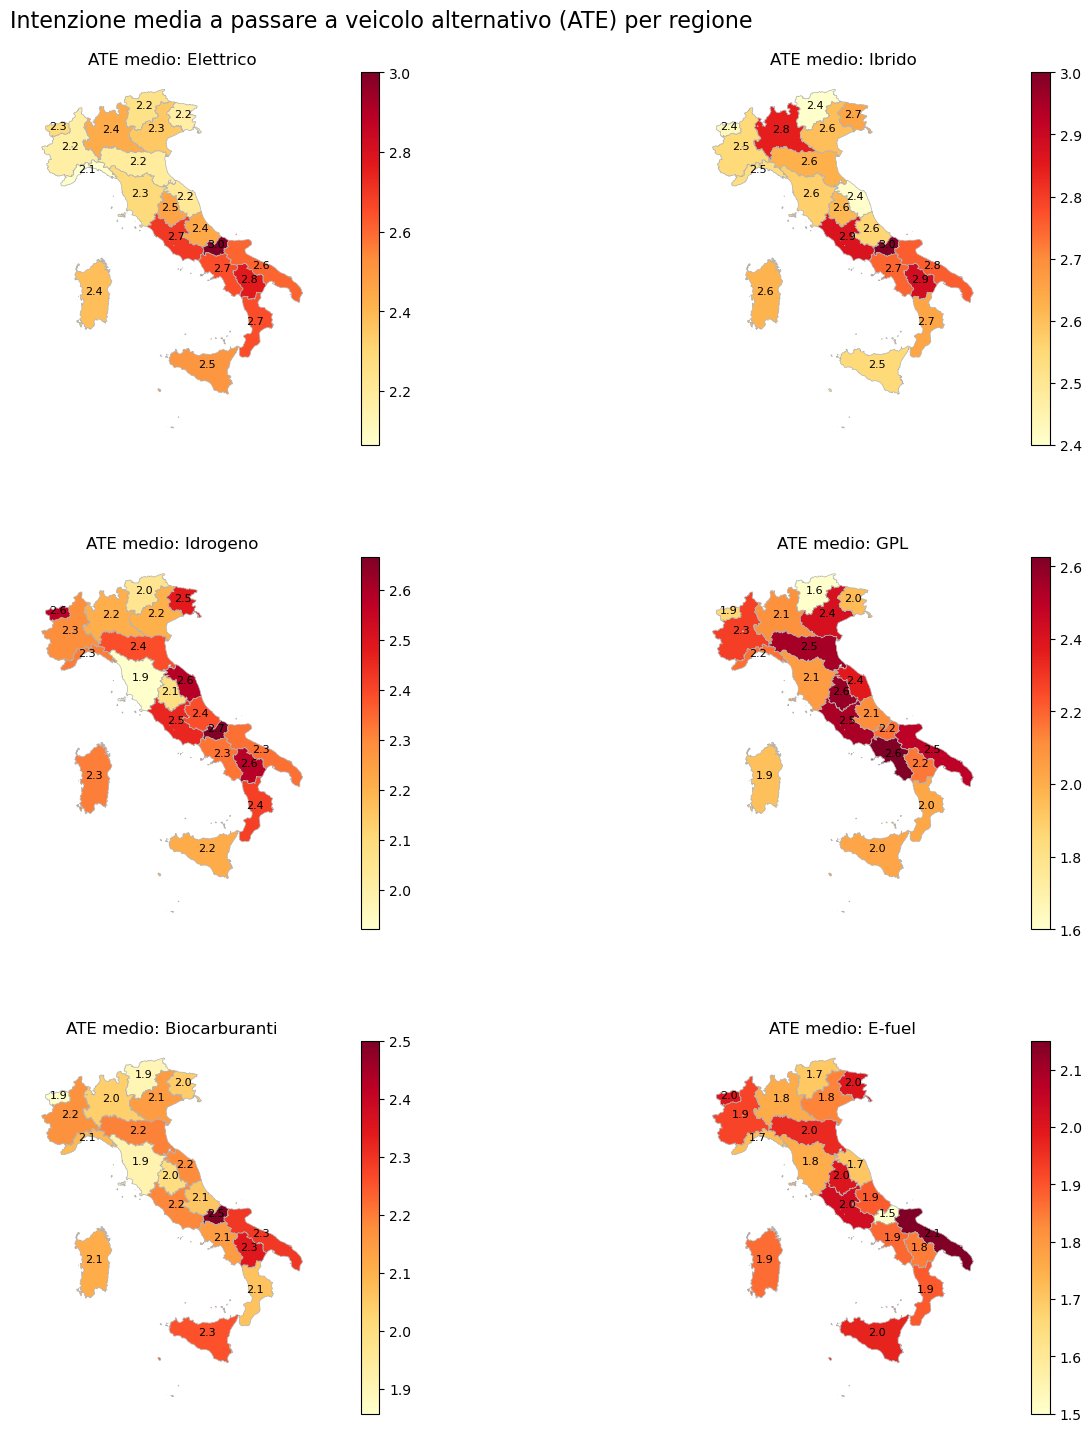

In [27]:
# Librerie
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Caricamento dati
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona colonne di interesse
ate_columns = ["ID", "regione", "ATE_1", "ATE_2", "ATE_3", "ATE_4", "ATE_5", "ATE_6"]
df_ate = df[ate_columns].drop_duplicates(subset="ID")

# Calcola la media per regione
df_ate_region = df_ate.groupby("regione")[["ATE_1", "ATE_2", "ATE_3", "ATE_4", "ATE_5", "ATE_6"]].mean().reset_index()

# Carica geodati delle regioni italiane
url = "https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson"
gdf = gpd.read_file(url)

# Mappa nomi delle regioni per allineamento
mappa_regioni = {
    "Emilia Romagna": "Emilia-Romagna",
    "Friuli Venezia Giulia": "Friuli-Venezia Giulia",
    "Trentino Alto Adige": "Trentino-Alto Adige/Südtirol",
    "Valle D'Aosta": "Valle d'Aosta/Vallée d'Aoste",
}

df_ate_region["regione"] = df_ate_region["regione"].replace(mappa_regioni)
gdf = gdf.rename(columns={"reg_name": "regione"})

# Merge geografico
gdf_merged = gdf.merge(df_ate_region, on="regione", how="left")

# Titoli per le tecnologie
ate_labels = {
    "ATE_1": "Elettrico",
    "ATE_2": "Ibrido",
    "ATE_3": "Idrogeno",
    "ATE_4": "GPL",
    "ATE_5": "Biocarburanti",
    "ATE_6": "E-fuel"
}

# Crea sottotrame 3x2
fig, axs = plt.subplots(3, 2, figsize=(16, 14))
axs = axs.flatten()

# Colormap
cmap = "YlOrRd"


# Crea una mappa per ciascun tipo di veicolo
for i, col in enumerate(ate_labels.keys()):
    gdf_merged.plot(column=col,
                    cmap=cmap,
                    linewidth=0.5,
                    edgecolor='0.7',
                    legend=True,
                    ax=axs[i],
                    missing_kwds={'color': 'lightgrey'}
                   )
    
    axs[i].set_title(f"ATE medio: {ate_labels[col]}", fontsize=12)
    axs[i].axis("off")

    # Annotazioni con valori medi
    for idx, row in gdf_merged.iterrows():
        val = row[col]
        if pd.notnull(val):
            axs[i].text(row.geometry.centroid.x,
                        row.geometry.centroid.y,
                        f"{val:.1f}",
                        ha="center",
                        fontsize=8,
                        color="black"
                       )

# Imposta layout
plt.tight_layout()
plt.suptitle("Intenzione media a passare a veicolo alternativo (ATE) per regione", fontsize=16, y=1.02)
plt.subplots_adjust(hspace=0.3)
plt.show()

## Quanto vorrei passare ad un veicolo XXX per regione di italia

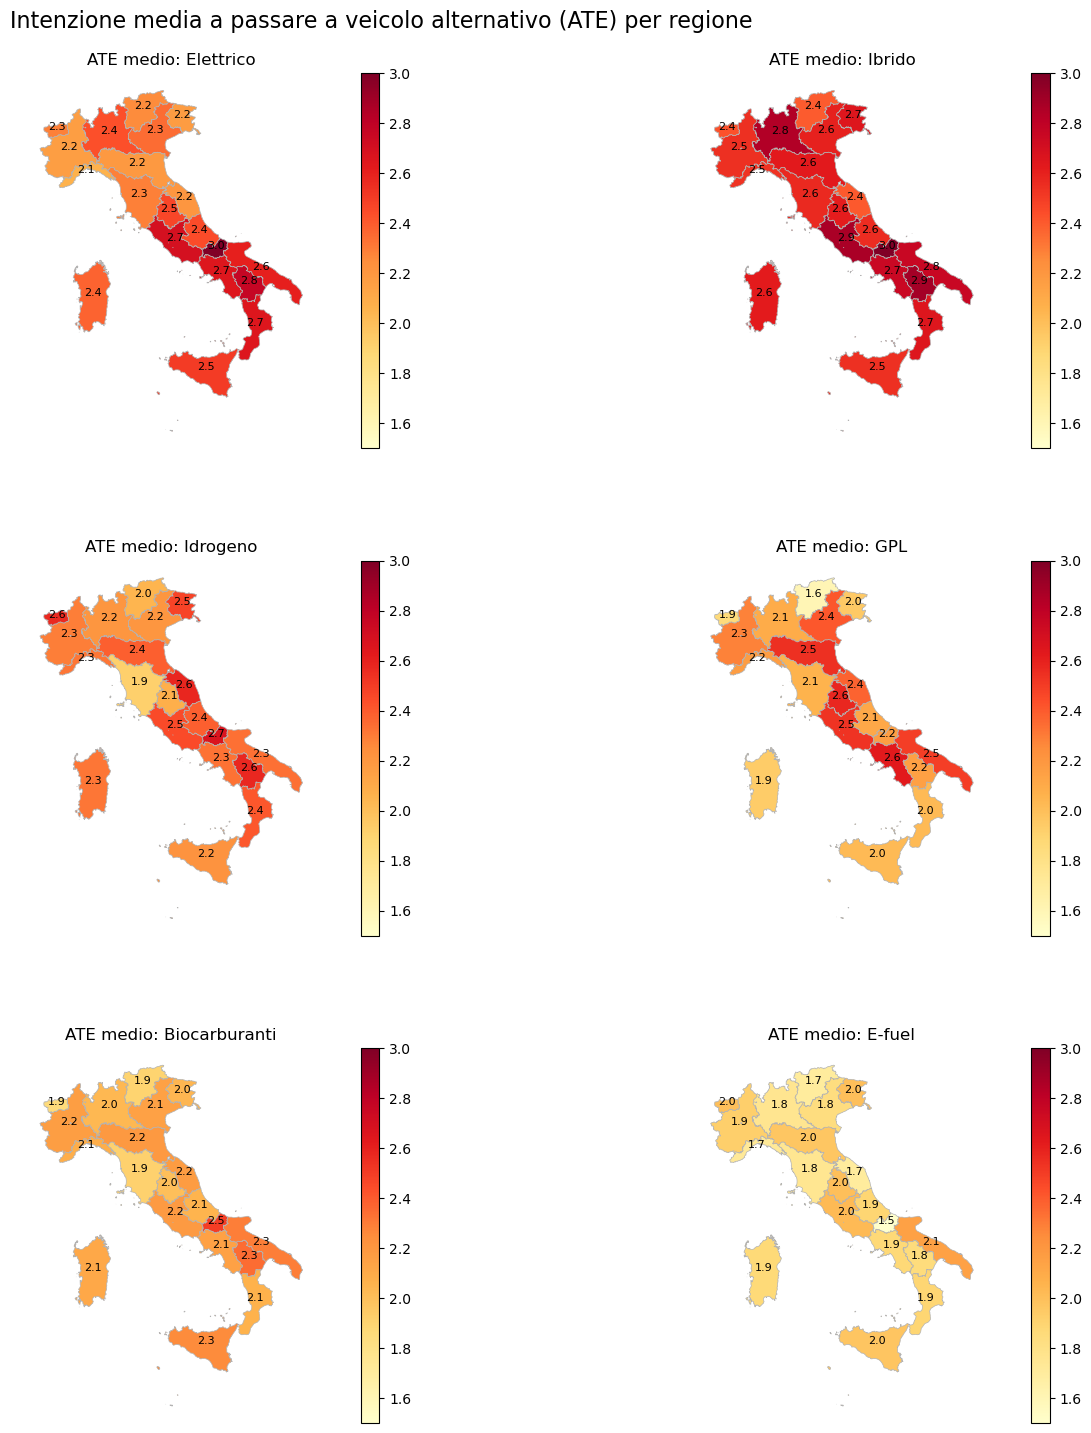

In [26]:
# Librerie
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Caricamento dati
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona colonne di interesse
ate_columns = ["ID", "regione", "ATE_1", "ATE_2", "ATE_3", "ATE_4", "ATE_5", "ATE_6"]
df_ate = df[ate_columns].drop_duplicates(subset="ID")

# Calcola la media per regione
df_ate_region = df_ate.groupby("regione")[["ATE_1", "ATE_2", "ATE_3", "ATE_4", "ATE_5", "ATE_6"]].mean().reset_index()

# Carica geodati delle regioni italiane
url = "https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson"
gdf = gpd.read_file(url)

# Mappa nomi delle regioni per allineamento
mappa_regioni = {
    "Emilia Romagna": "Emilia-Romagna",
    "Friuli Venezia Giulia": "Friuli-Venezia Giulia",
    "Trentino Alto Adige": "Trentino-Alto Adige/Südtirol",
    "Valle D'Aosta": "Valle d'Aosta/Vallée d'Aoste",
}

df_ate_region["regione"] = df_ate_region["regione"].replace(mappa_regioni)
gdf = gdf.rename(columns={"reg_name": "regione"})

# Merge geografico
gdf_merged = gdf.merge(df_ate_region, on="regione", how="left")

# Titoli per le tecnologie
ate_labels = {
    "ATE_1": "Elettrico",
    "ATE_2": "Ibrido",
    "ATE_3": "Idrogeno",
    "ATE_4": "GPL",
    "ATE_5": "Biocarburanti",
    "ATE_6": "E-fuel"
}

# Crea sottotrame 3x2
fig, axs = plt.subplots(3, 2, figsize=(16, 14))
axs = axs.flatten()

# Colormap
cmap = "YlOrRd"

columns = list(ate_labels.keys())
vmax = df_ate_region[columns].max().max()  # massimo globale fra tutte le colonne
vmin = df_ate_region[columns].min().min()  # massimo globale fra tutte le colonne

# Crea una mappa per ciascun tipo di veicolo
for i, col in enumerate(ate_labels.keys()):
    gdf_merged.plot(column=col,
                    cmap=cmap,
                    linewidth=0.5,
                    edgecolor='0.7',
                    legend=True,
                    ax=axs[i],
                    missing_kwds={'color': 'lightgrey'},
                    vmin=vmin,
                    vmax=vmax
                   )
    
    axs[i].set_title(f"ATE medio: {ate_labels[col]}", fontsize=12)
    axs[i].axis("off")

    # Annotazioni con valori medi
    for idx, row in gdf_merged.iterrows():
        val = row[col]
        if pd.notnull(val):
            axs[i].text(row.geometry.centroid.x,
                        row.geometry.centroid.y,
                        f"{val:.1f}",
                        ha="center",
                        fontsize=8,
                        color="black"
                       )

# Imposta layout
plt.tight_layout()
plt.suptitle("Intenzione media a passare a veicolo alternativo (ATE) per regione", fontsize=16, y=1.02)
plt.subplots_adjust(hspace=0.3)
plt.show()

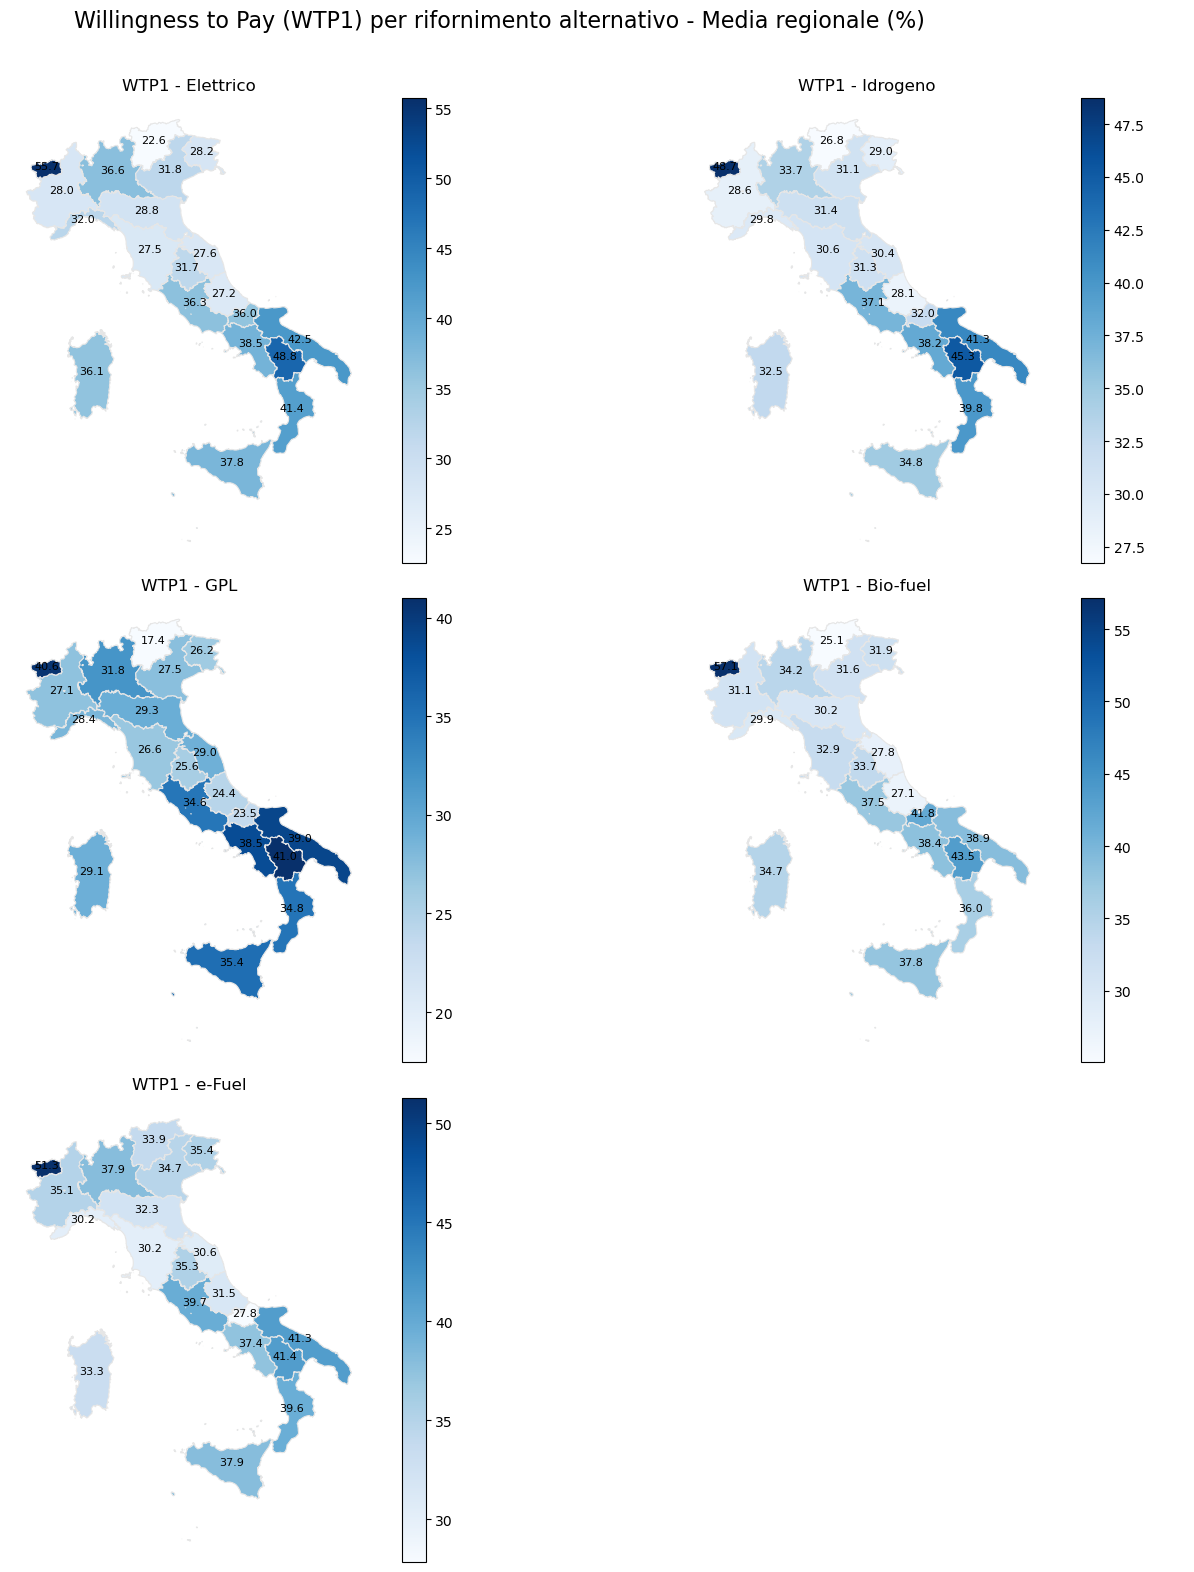

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Caricamento dati
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona colonne WTP1 e regione
wtp1_columns = ["ID", "regione", "WTP1_1", "WTP1_2", "WTP1_3", "WTP1_4", "WTP1_5"]
df_wtp1 = df[wtp1_columns].drop_duplicates(subset="ID")

# Media per regione
df_wtp1_region = df_wtp1.groupby("regione")[["WTP1_1", "WTP1_2", "WTP1_3", "WTP1_4", "WTP1_5"]].mean().reset_index()

# Rinomina colonne per leggibilità
df_wtp1_region.columns = ["regione", "Elettrico", "Idrogeno", "GPL", "Bio-fuel", "e-Fuel"]

# Correggi nomi delle regioni per il merge
mappa_regioni = {
    "Emilia Romagna": "Emilia-Romagna",
    "Friuli Venezia Giulia": "Friuli-Venezia Giulia",
    "Trentino Alto Adige": "Trentino-Alto Adige/Südtirol",
    "Valle D'Aosta": "Valle d'Aosta/Vallée d'Aoste"
}
df_wtp1_region["regione"] = df_wtp1_region["regione"].replace(mappa_regioni)

# Carica GeoJSON da file locale (o web se esegui in locale con internet)
url = "https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson"
gdf = gpd.read_file(url)
gdf = gdf.rename(columns={"reg_name": "regione"})

# Merge
gdf_merged = gdf.merge(df_wtp1_region, on="regione", how="left")

# Setup figure
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
axes = axes.flatten()

# Colonne da plottare
fuel_labels = ["Elettrico", "Idrogeno", "GPL", "Bio-fuel", "e-Fuel"]



for i, fuel in enumerate(fuel_labels):
    gdf_merged.plot(column=fuel, cmap="Blues", linewidth=0.8, edgecolor='0.9',
                    legend=True, ax=axes[i])
    axes[i].set_title(f"WTP1 - {fuel}", fontsize=12)
    axes[i].axis("off")

    # Annotazioni
    for idx, row in gdf_merged.iterrows():
        val = row[fuel]
        if pd.notnull(val):
            coords = row["geometry"].centroid
            axes[i].text(coords.x, coords.y, f"{val:.1f}", ha='center', fontsize=8, color="black")

# Rimuovi ultimo pannello vuoto
axes[-1].axis("off")
plt.suptitle("Willingness to Pay (WTP1) per rifornimento alternativo - Media regionale (%)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

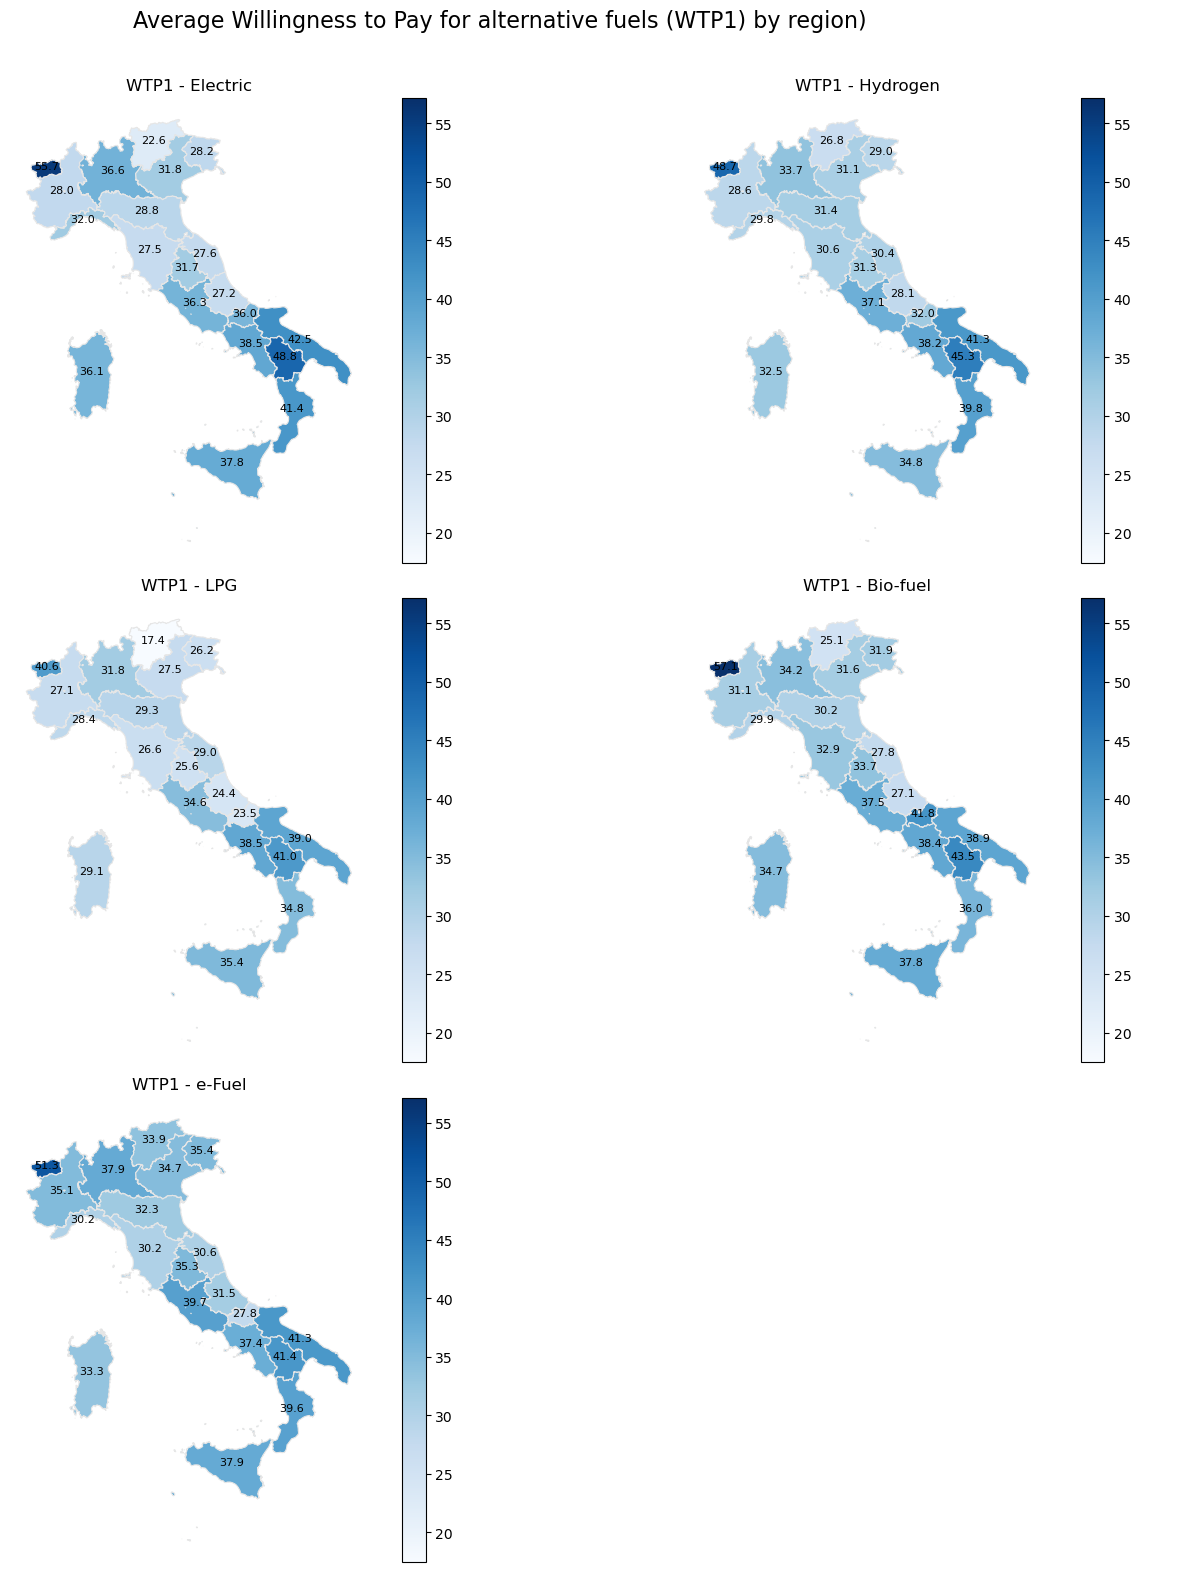

In [46]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Caricamento dati
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona colonne WTP1 e regione
wtp1_columns = ["ID", "regione", "WTP1_1", "WTP1_2", "WTP1_3", "WTP1_4", "WTP1_5"]
df_wtp1 = df[wtp1_columns].drop_duplicates(subset="ID")

# Media per regione
df_wtp1_region = df_wtp1.groupby("regione")[["WTP1_1", "WTP1_2", "WTP1_3", "WTP1_4", "WTP1_5"]].mean().reset_index()

# Rinomina colonne per leggibilità
df_wtp1_region.columns = ["regione", "Electric", "Hydrogen", "LPG", "Bio-fuel", "e-Fuel"]

# Correggi nomi delle regioni per il merge
mappa_regioni = {
    "Emilia Romagna": "Emilia-Romagna",
    "Friuli Venezia Giulia": "Friuli-Venezia Giulia",
    "Trentino Alto Adige": "Trentino-Alto Adige/Südtirol",
    "Valle D'Aosta": "Valle d'Aosta/Vallée d'Aoste"
}
df_wtp1_region["regione"] = df_wtp1_region["regione"].replace(mappa_regioni)

# Carica GeoJSON da file locale (o web se esegui in locale con internet)
url = "https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson"
gdf = gpd.read_file(url)
gdf = gdf.rename(columns={"reg_name": "regione"})

# Merge
gdf_merged = gdf.merge(df_wtp1_region, on="regione", how="left")

# Setup figure
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
axes = axes.flatten()

# Columns to plot
fuel_labels = ["Electric", "Hydrogen", "LPG", "Bio-fuel", "e-Fuel"]

vmax = df_wtp1_region[fuel_labels].max().max()  # massimo globale fra tutte le colonne
vmin = df_wtp1_region[fuel_labels].min().min() # minimo globale fra tutte le colonne

for i, fuel in enumerate(fuel_labels):
    gdf_merged.plot(
        column=fuel,
        cmap="Blues",
        linewidth=0.8,
        edgecolor='0.9',
        legend=True,
        ax=axes[i],
        vmin=vmin,
        vmax=vmax
    )
    axes[i].set_title(f"WTP1 - {fuel}", fontsize=12)
    axes[i].axis("off")
    # Annotazioni
    for idx, row in gdf_merged.iterrows():
        val = row[fuel]
        if pd.notnull(val):
            coords = row["geometry"].centroid
            axes[i].text(coords.x, coords.y, f"{val:.1f}", ha='center', fontsize=8, color="black")

# Rimuovi ultimo pannello vuoto
axes[-1].axis("off")
plt.suptitle("Average Willingness to Pay for alternative fuels (WTP1) by region)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## ATE per macro regione

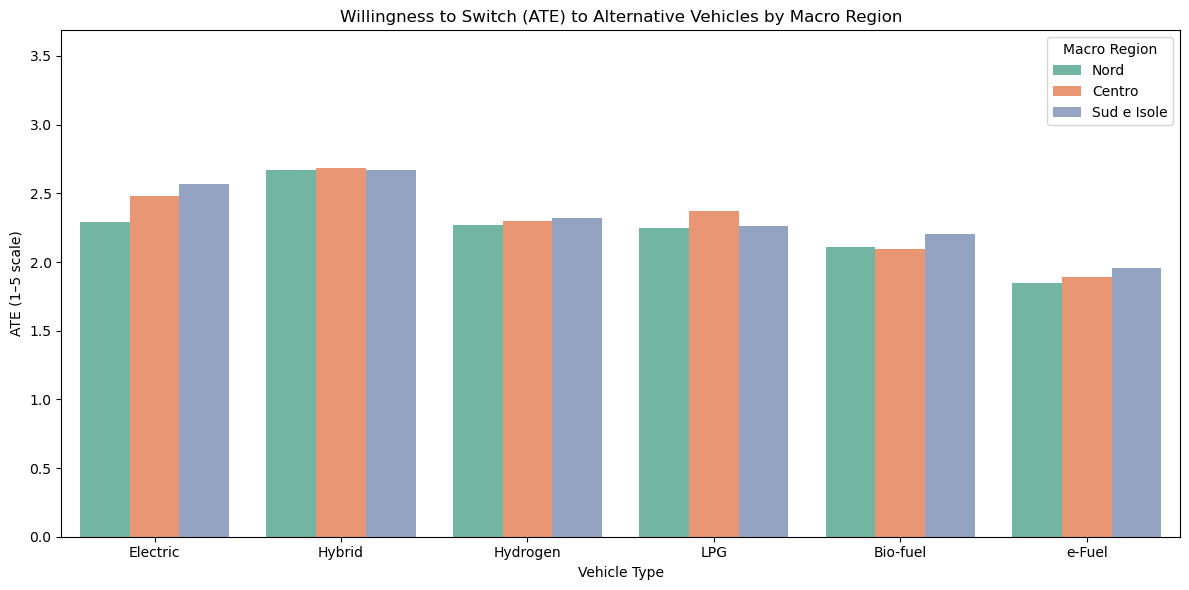

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il dataset
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona le colonne rilevanti per ATE
ate_cols = ["ID", "Area", "ATE_1", "ATE_2", "ATE_3", "ATE_4", "ATE_5", "ATE_6"]
df_ate = df[ate_cols].drop_duplicates(subset="ID")

# Calcola media per ciascuna Area
agg_mean = df_ate.groupby("Area")[["ATE_1", "ATE_2", "ATE_3", "ATE_4", "ATE_5", "ATE_6"]].mean()

# Riorganizza in formato long
df_plot = agg_mean.reset_index().melt(id_vars="Area", var_name="Fuel", value_name="ATE")

# Rinomina le etichette dei carburanti
fuel_labels = {
    "ATE_1": "Electric",
    "ATE_2": "Hybrid",
    "ATE_3": "Hydrogen",
    "ATE_4": "LPG",
    "ATE_5": "Bio-fuel",
    "ATE_6": "e-Fuel"
}
df_plot["Fuel"] = df_plot["Fuel"].replace(fuel_labels)

# Ordina le regioni se necessario
df_plot["Area"] = pd.Categorical(df_plot["Area"], categories=["Nord", "Centro", "Sud e Isole"], ordered=True)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_plot, x="Fuel", y="ATE", hue="Area", palette="Set2")

# Dettagli grafici
plt.title("Willingness to Switch (ATE) to Alternative Vehicles by Macro Region")
plt.ylabel("ATE (1–5 scale)")
plt.xlabel("Vehicle Type")
plt.ylim(0, df_plot["ATE"].max() + 1)
plt.legend(title="Macro Region")
plt.tight_layout()
plt.show()


## WTP1 per macroregione

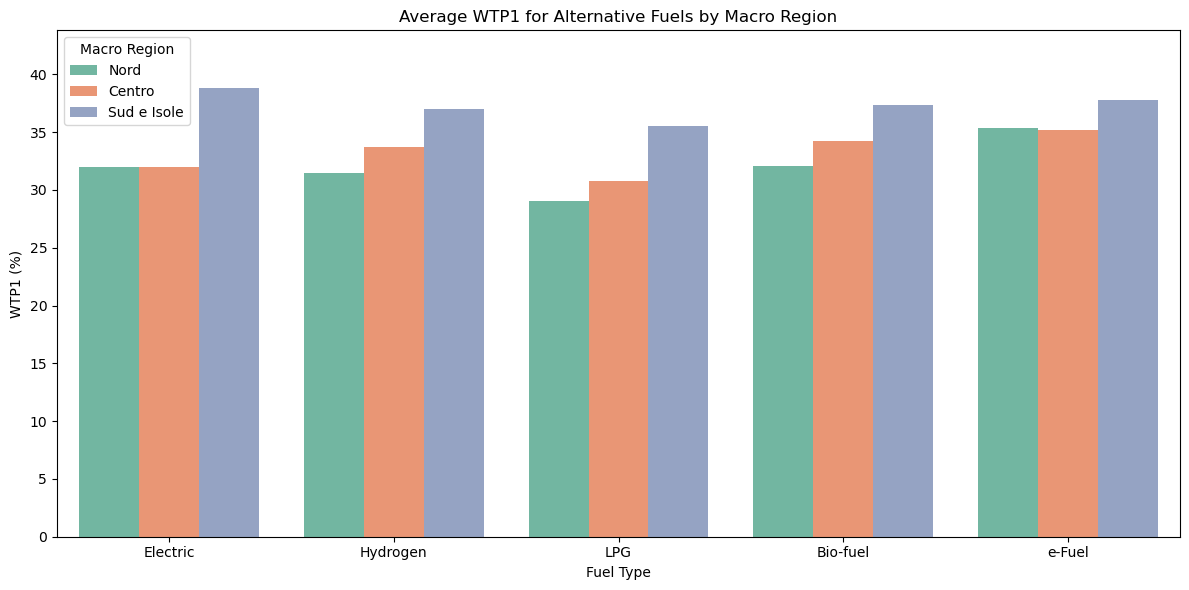

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il dataset
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona le colonne rilevanti per WTP1
wtp_cols = ["ID", "Area", "WTP1_1", "WTP1_2", "WTP1_3", "WTP1_4", "WTP1_5"]
df_wtp = df[wtp_cols].drop_duplicates(subset="ID")

# Calcola media per ciascuna Area
agg_mean = df_wtp.groupby("Area")[["WTP1_1", "WTP1_2", "WTP1_3", "WTP1_4", "WTP1_5"]].mean()

# Riorganizza in formato long
df_plot = agg_mean.reset_index().melt(id_vars="Area", var_name="Fuel", value_name="WTP1")

# Rinomina le etichette dei carburanti
fuel_labels = {
    "WTP1_1": "Electric",
    "WTP1_2": "Hydrogen",
    "WTP1_3": "LPG",
    "WTP1_4": "Bio-fuel",
    "WTP1_5": "e-Fuel"
}
df_plot["Fuel"] = df_plot["Fuel"].replace(fuel_labels)

# Ordina le regioni se necessario
df_plot["Area"] = pd.Categorical(df_plot["Area"], categories=["Nord", "Centro", "Sud e Isole"], ordered=True)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_plot, x="Fuel", y="WTP1", hue="Area", palette="Set2")

# Dettagli grafici
plt.title("Average WTP1 for Alternative Fuels by Macro Region")
plt.ylabel("WTP1 (%)")
plt.xlabel("Fuel Type")
plt.ylim(0, df_plot["WTP1"].max() + 5)
plt.legend(title="Macro Region")
plt.tight_layout()
plt.show()


## WTP2 per macroregione

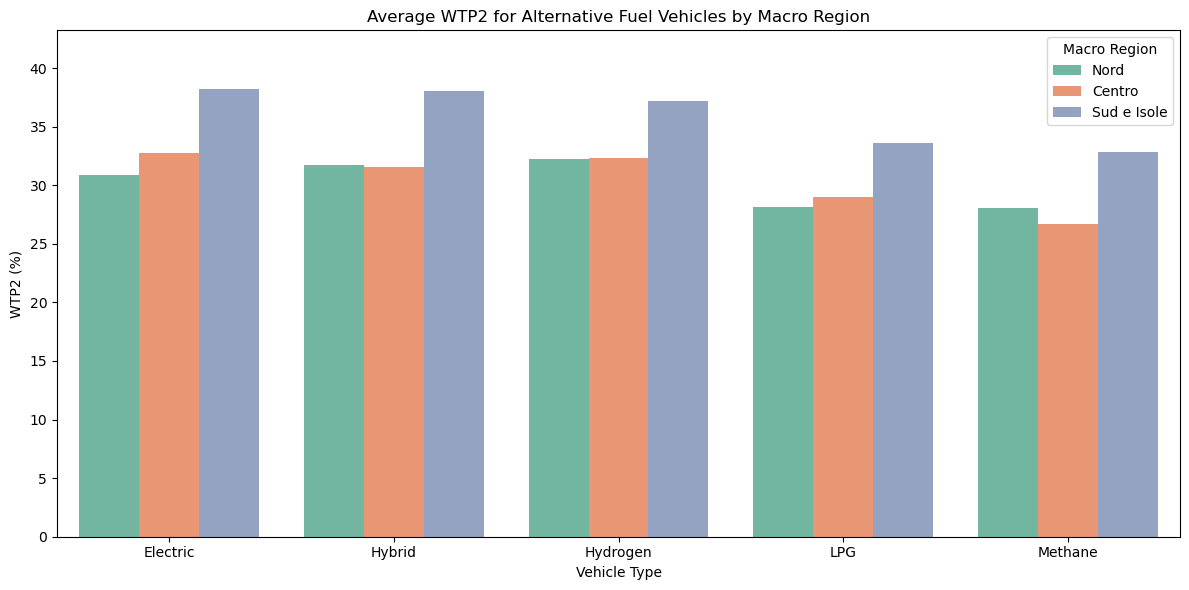

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il dataset
df = pd.read_csv("DF.csv", sep=";", encoding="utf-8")

# Seleziona le colonne rilevanti per WTP2
wtp2_cols = ["ID", "Area", "WTP2_1", "WTP2_2", "WTP2_3", "WTP2_4", "WTP2_5"]
df_wtp2 = df[wtp2_cols].drop_duplicates(subset="ID")

# Calcola media per ciascuna Area
agg_mean = df_wtp2.groupby("Area")[["WTP2_1", "WTP2_2", "WTP2_3", "WTP2_4", "WTP2_5"]].mean()

# Riorganizza in formato long
df_plot = agg_mean.reset_index().melt(id_vars="Area", var_name="Fuel", value_name="WTP2")

# Rinomina le etichette dei carburanti
fuel_labels = {
    "WTP2_1": "Electric",
    "WTP2_2": "Hybrid",
    "WTP2_3": "Hydrogen",
    "WTP2_4": "LPG",
    "WTP2_5": "Methane"
}
df_plot["Fuel"] = df_plot["Fuel"].replace(fuel_labels)

# Ordina le regioni se necessario
df_plot["Area"] = pd.Categorical(df_plot["Area"], categories=["Nord", "Centro", "Sud e Isole"], ordered=True)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_plot, x="Fuel", y="WTP2", hue="Area", palette="Set2")

# Dettagli grafici
plt.title("Average WTP2 for Alternative Fuel Vehicles by Macro Region")
plt.ylabel("WTP2 (%)")
plt.xlabel("Vehicle Type")
plt.ylim(0, df_plot["WTP2"].max() + 5)
plt.legend(title="Macro Region")
plt.tight_layout()
plt.show()